# <span style= "color:purple">Etude de marché - L'envol des poulets !</span>

![banniere](assets/banniere.jpeg)

## <span style="color:orange">Sommaire</span>

1. [Première classification des pays via CAH](#cah)
    1. [Premier clustering](#clust)    
    1. [Attribution des 5 groupes et World map de répartition](#group)
    1. [Visualisation en boxplots de la distribution des variables par Cluster](#boxplot)
    1. [Première sélection des pays via CAH sur bilans alimentaires](#selectcah1)
2. [Comparaison avec le Kmeans](#kmeans)
    1. [Kmeans sur les données centrées réduites](#kmeans1)    
    1. [ACP - Eboulis des valeurs propres](#eboulis)
    1. [Cercle des corrélations](#ccorr)
    1. [Projection sur les plans factoriels](#facto)    
    1. [Méthode des centres mobiles (aide à la détection du meilleur K)](#kmeans2)    
3. [Interprétation des Clusters](#interp)     
    1. [Moyennes conditionnelles et effectifs](#moykm)    
    1. [Boxplots sur les variables et variables synthétiques](#boxkm)    
    1. [Sélections des pays sur clusters Kmeans](#selectkm)
4. [Seconde classification sur données étendues](#cah-etendue)
    1. [Second clustering](#clust2)    
    1. [Attribution des nouveaux clusters](#group2)
    1. [Moyennes empiriques des variables par groupes](#moy)    
    1. [Seconde sélection des pays via CAH sur données sociétales](#selectcahetendu)
5. [Comparaison sur les données étendues avec le Kmeans](#kmeans2)     
    1. [Détection du meilleur K sur données étendues](#cme)
    1. [Kmeans sur les données étendues centrées réduites](#kmeans3)     
    1. [ACP - Eboulis des valeurs propres sur données étendues](#eboulisetendu)
    1. [Cercle des corrélations sur données étendues](#ccorretendu)
    1. [Projection sur les plans factoriels](#factoe)     
6. [Interprétation des Clusters sur données étendues](#interpe)     
    1. [Moyennes conditionnelles et effectifs](#moykme)   
    1. [Sélection des pays avec les Kmeans des données étendues](#selectkme)    
7. [Comparaisons des pays issus des 2 méthodes](#comparee)    
8. [Sélection finale des pays pour export](#selectfin)
9. [Conclusion et recommandations](#conclusion)


## <span style="color:orange" id="cah">Première classification des pays via CAH</span>

La première classification sera établie sur la base des variables suivantes :
- **La différence de population entre l'année 2015 et l'année 2017, exprimée en pourcentage;**
- **La proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays;**
- **La disponibilité alimentaire en grammes de protéines par habitant ;**
- **La disponibilité alimentaire en Kcal par habitant.**

*La population totale du pays n'entrera pas en paramètre.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
from sklearn.cluster import KMeans
from sklearn import decomposition

In [2]:
df_bilans_fao = pd.read_csv("exports/dataset_fao.csv", sep=",", decimal=".", header=0, index_col = 1)
df_bilans_fao.head()

,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%)
Zone,,,,,,,
Arménie,1,2017,2944791.0,0.658,1123470.0,35540.05,45.774
Afghanistan,2,2017,36296113.0,5.470,730000.0,19742.85,19.505
Albanie,3,2017,2884169.0,-0.219,1241000.0,43635.75,55.491
Algérie,4,2017,41389189.0,4.181,1222385.0,33912.15,27.672
Angola,7,2017,29816766.0,6.930,828550.0,19750.15,30.456


In [3]:
# Affichage des dimensions
print(df_bilans_fao.shape)

(172, 7)


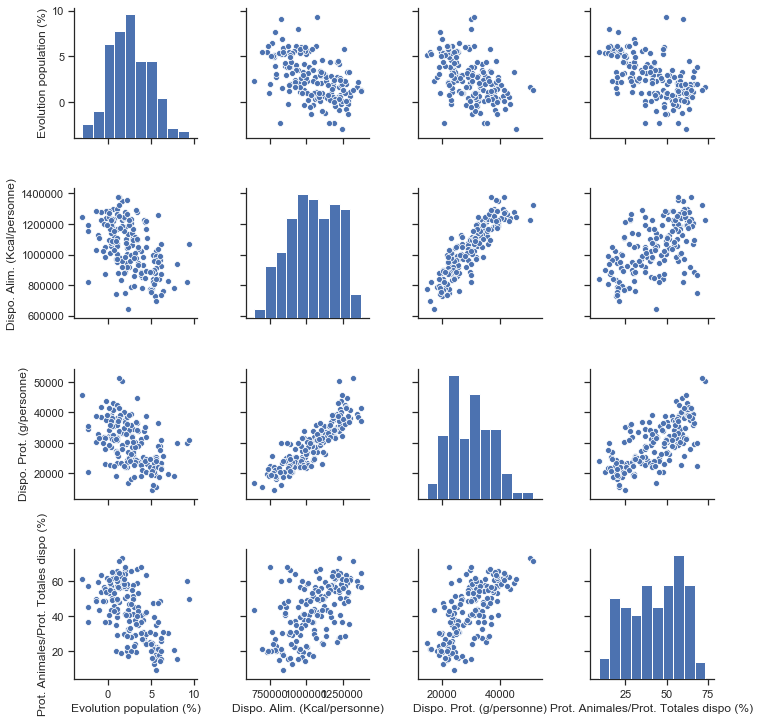

In [4]:
# Pairplot sur les variables 2 à 2 du dataset
sns.set(style="ticks")
sns.pairplot(df_bilans_fao[["Evolution population (%)", "Dispo. Alim. (Kcal/personne)",
                            "Dispo. Prot. (g/personne)","Prot. Animales/Prot. Totales dispo (%)"]])

### <span style = "color:blue" id="clust">Premier clustering</span>

In [5]:
# préparation des données pour le clustering
df_bilans_fao_clus = df_bilans_fao[["Evolution population (%)", "Dispo. Alim. (Kcal/personne)",
                                   "Dispo. Prot. (g/personne)","Prot. Animales/Prot. Totales dispo (%)"]]
# dans array numpy
X = df_bilans_fao_clus.values 
pays = df_bilans_fao_clus.index

In [6]:
# Centrage et Réduction
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_cr = std_scale.transform(X)

In [7]:
# Clustering hiérarchique avec librairie scipy
from scipy.cluster.hierarchy import linkage, fcluster

Z = linkage(X_cr, method='ward')

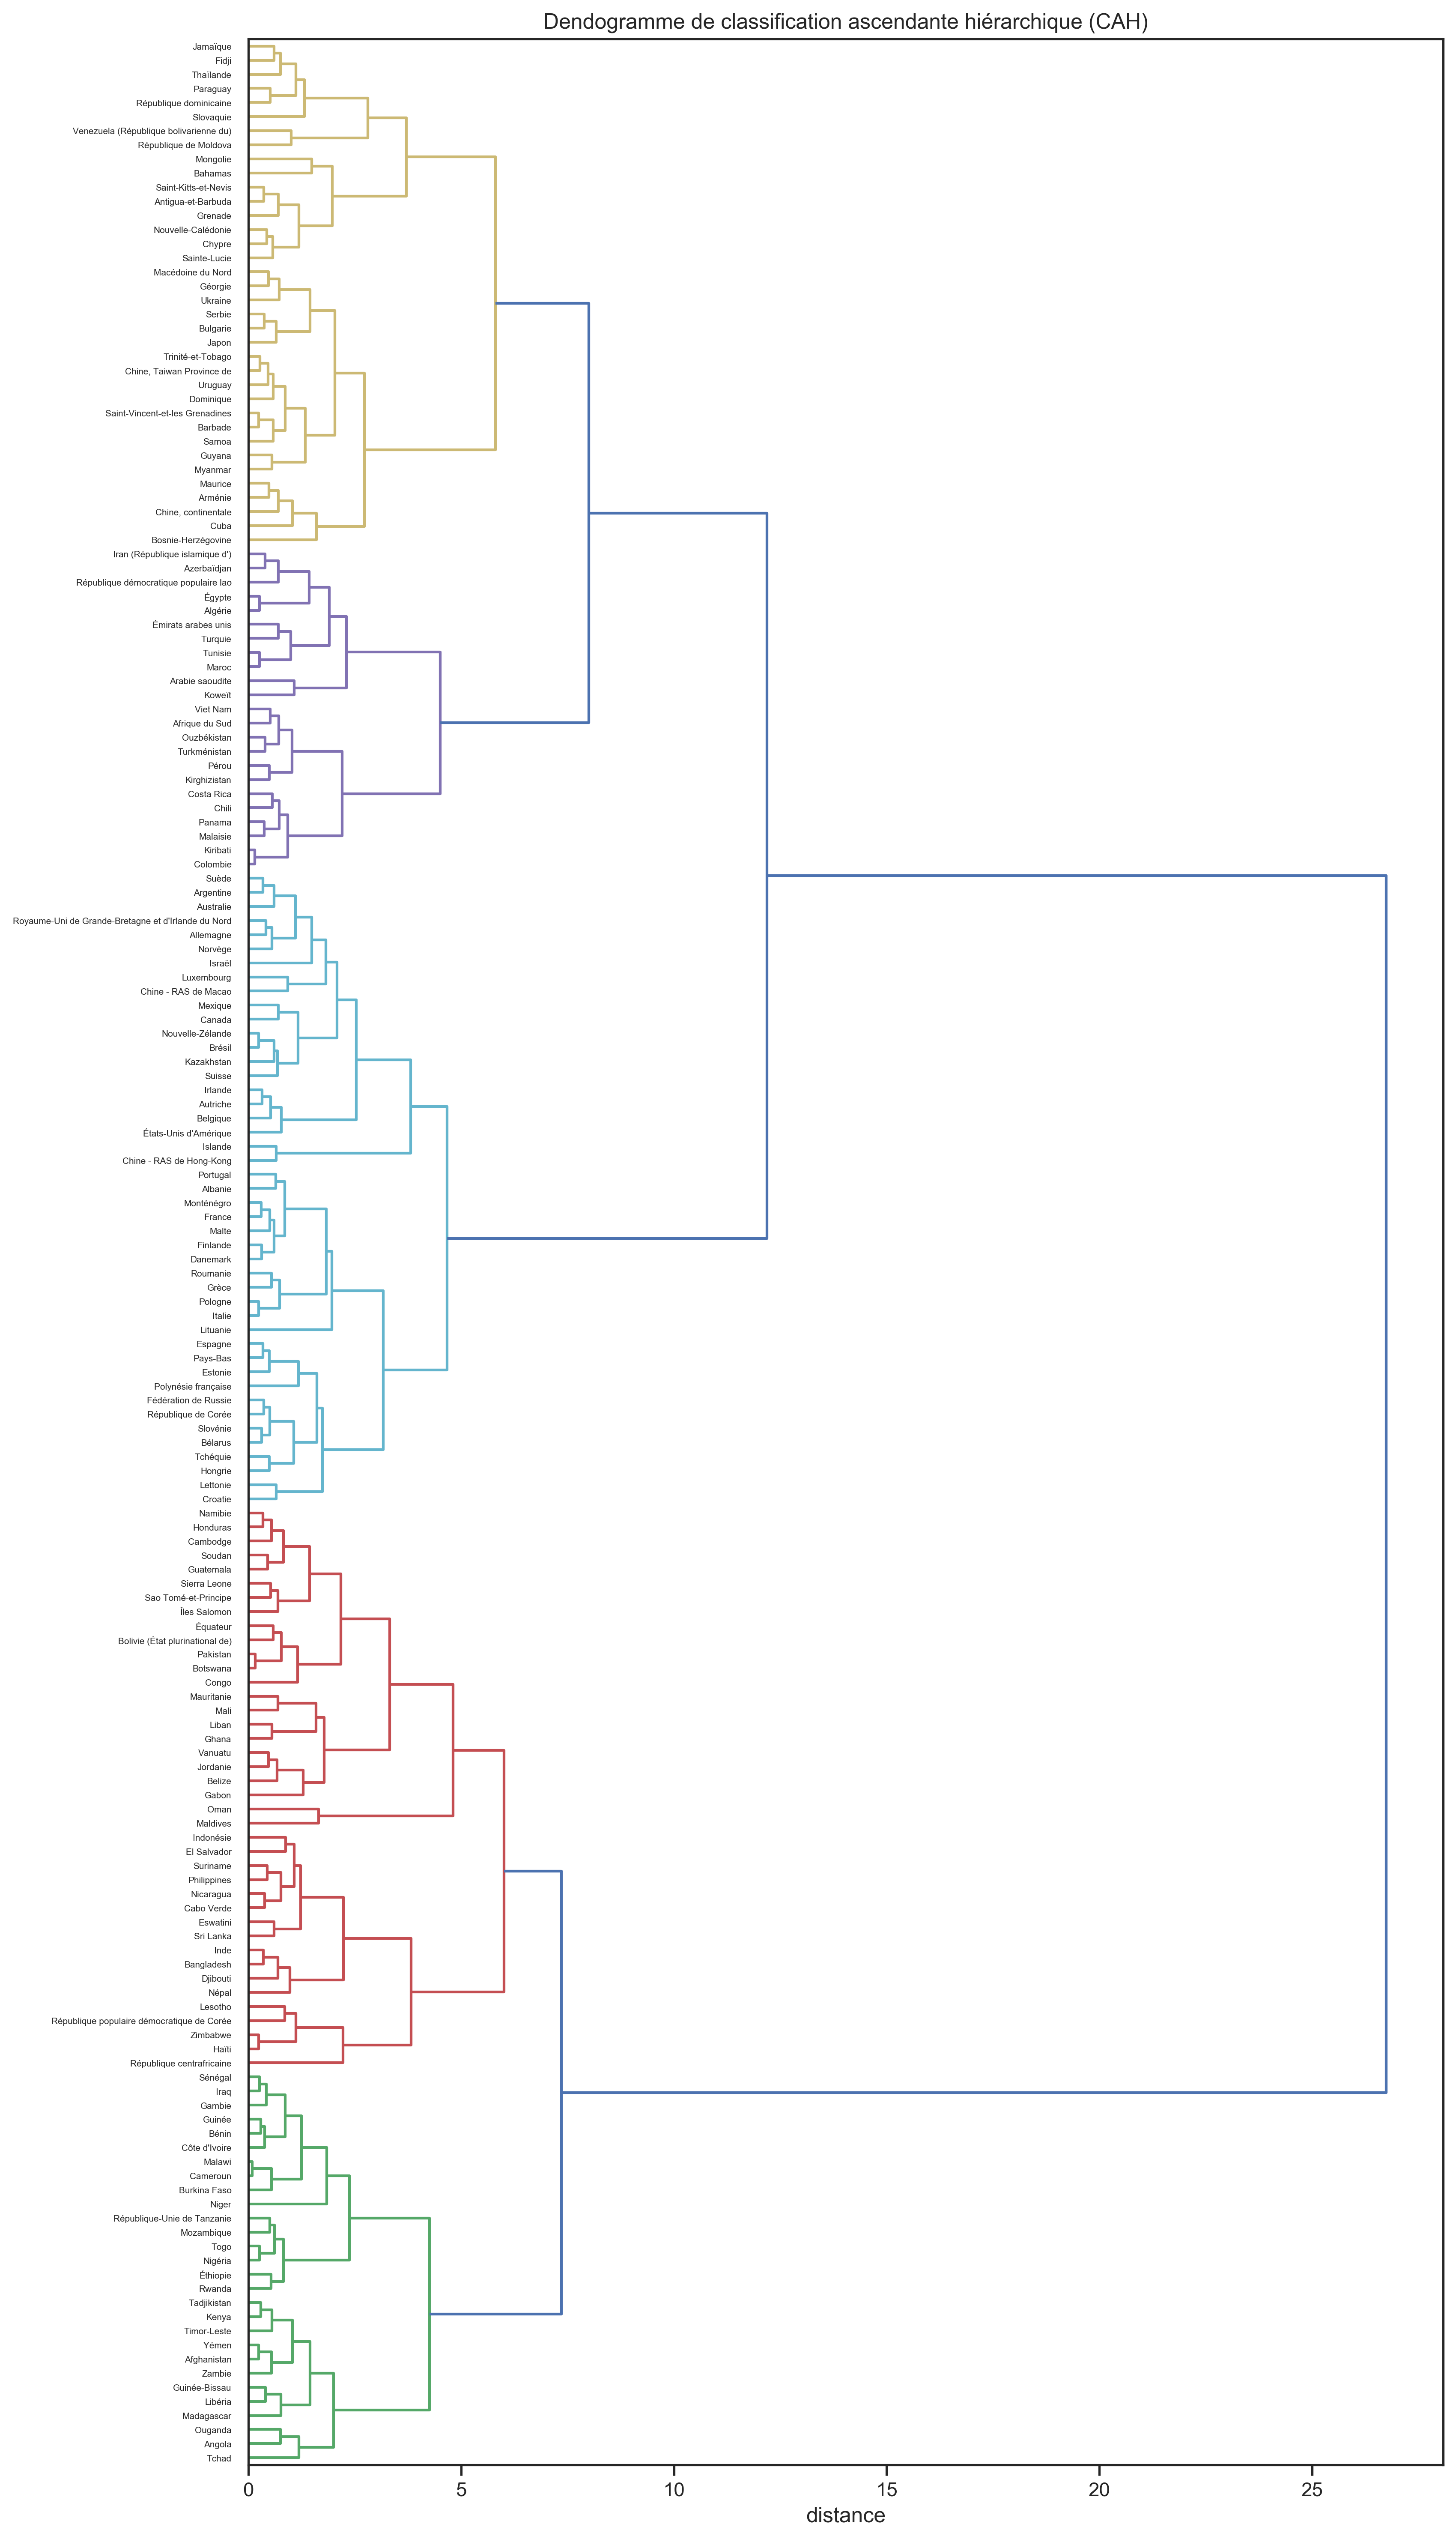

In [8]:
# Affichage du dendogramme
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12,25), dpi=300)
plt.title('Dendogramme de classification ascendante hiérarchique (CAH)')
plt.xlabel('distance')
dendrogram(
    Z,
    labels = pays,
    orientation = "right",
    color_threshold=7
)
plt.savefig('exports/dendogram_CAH_1.png')
plt.show()
     

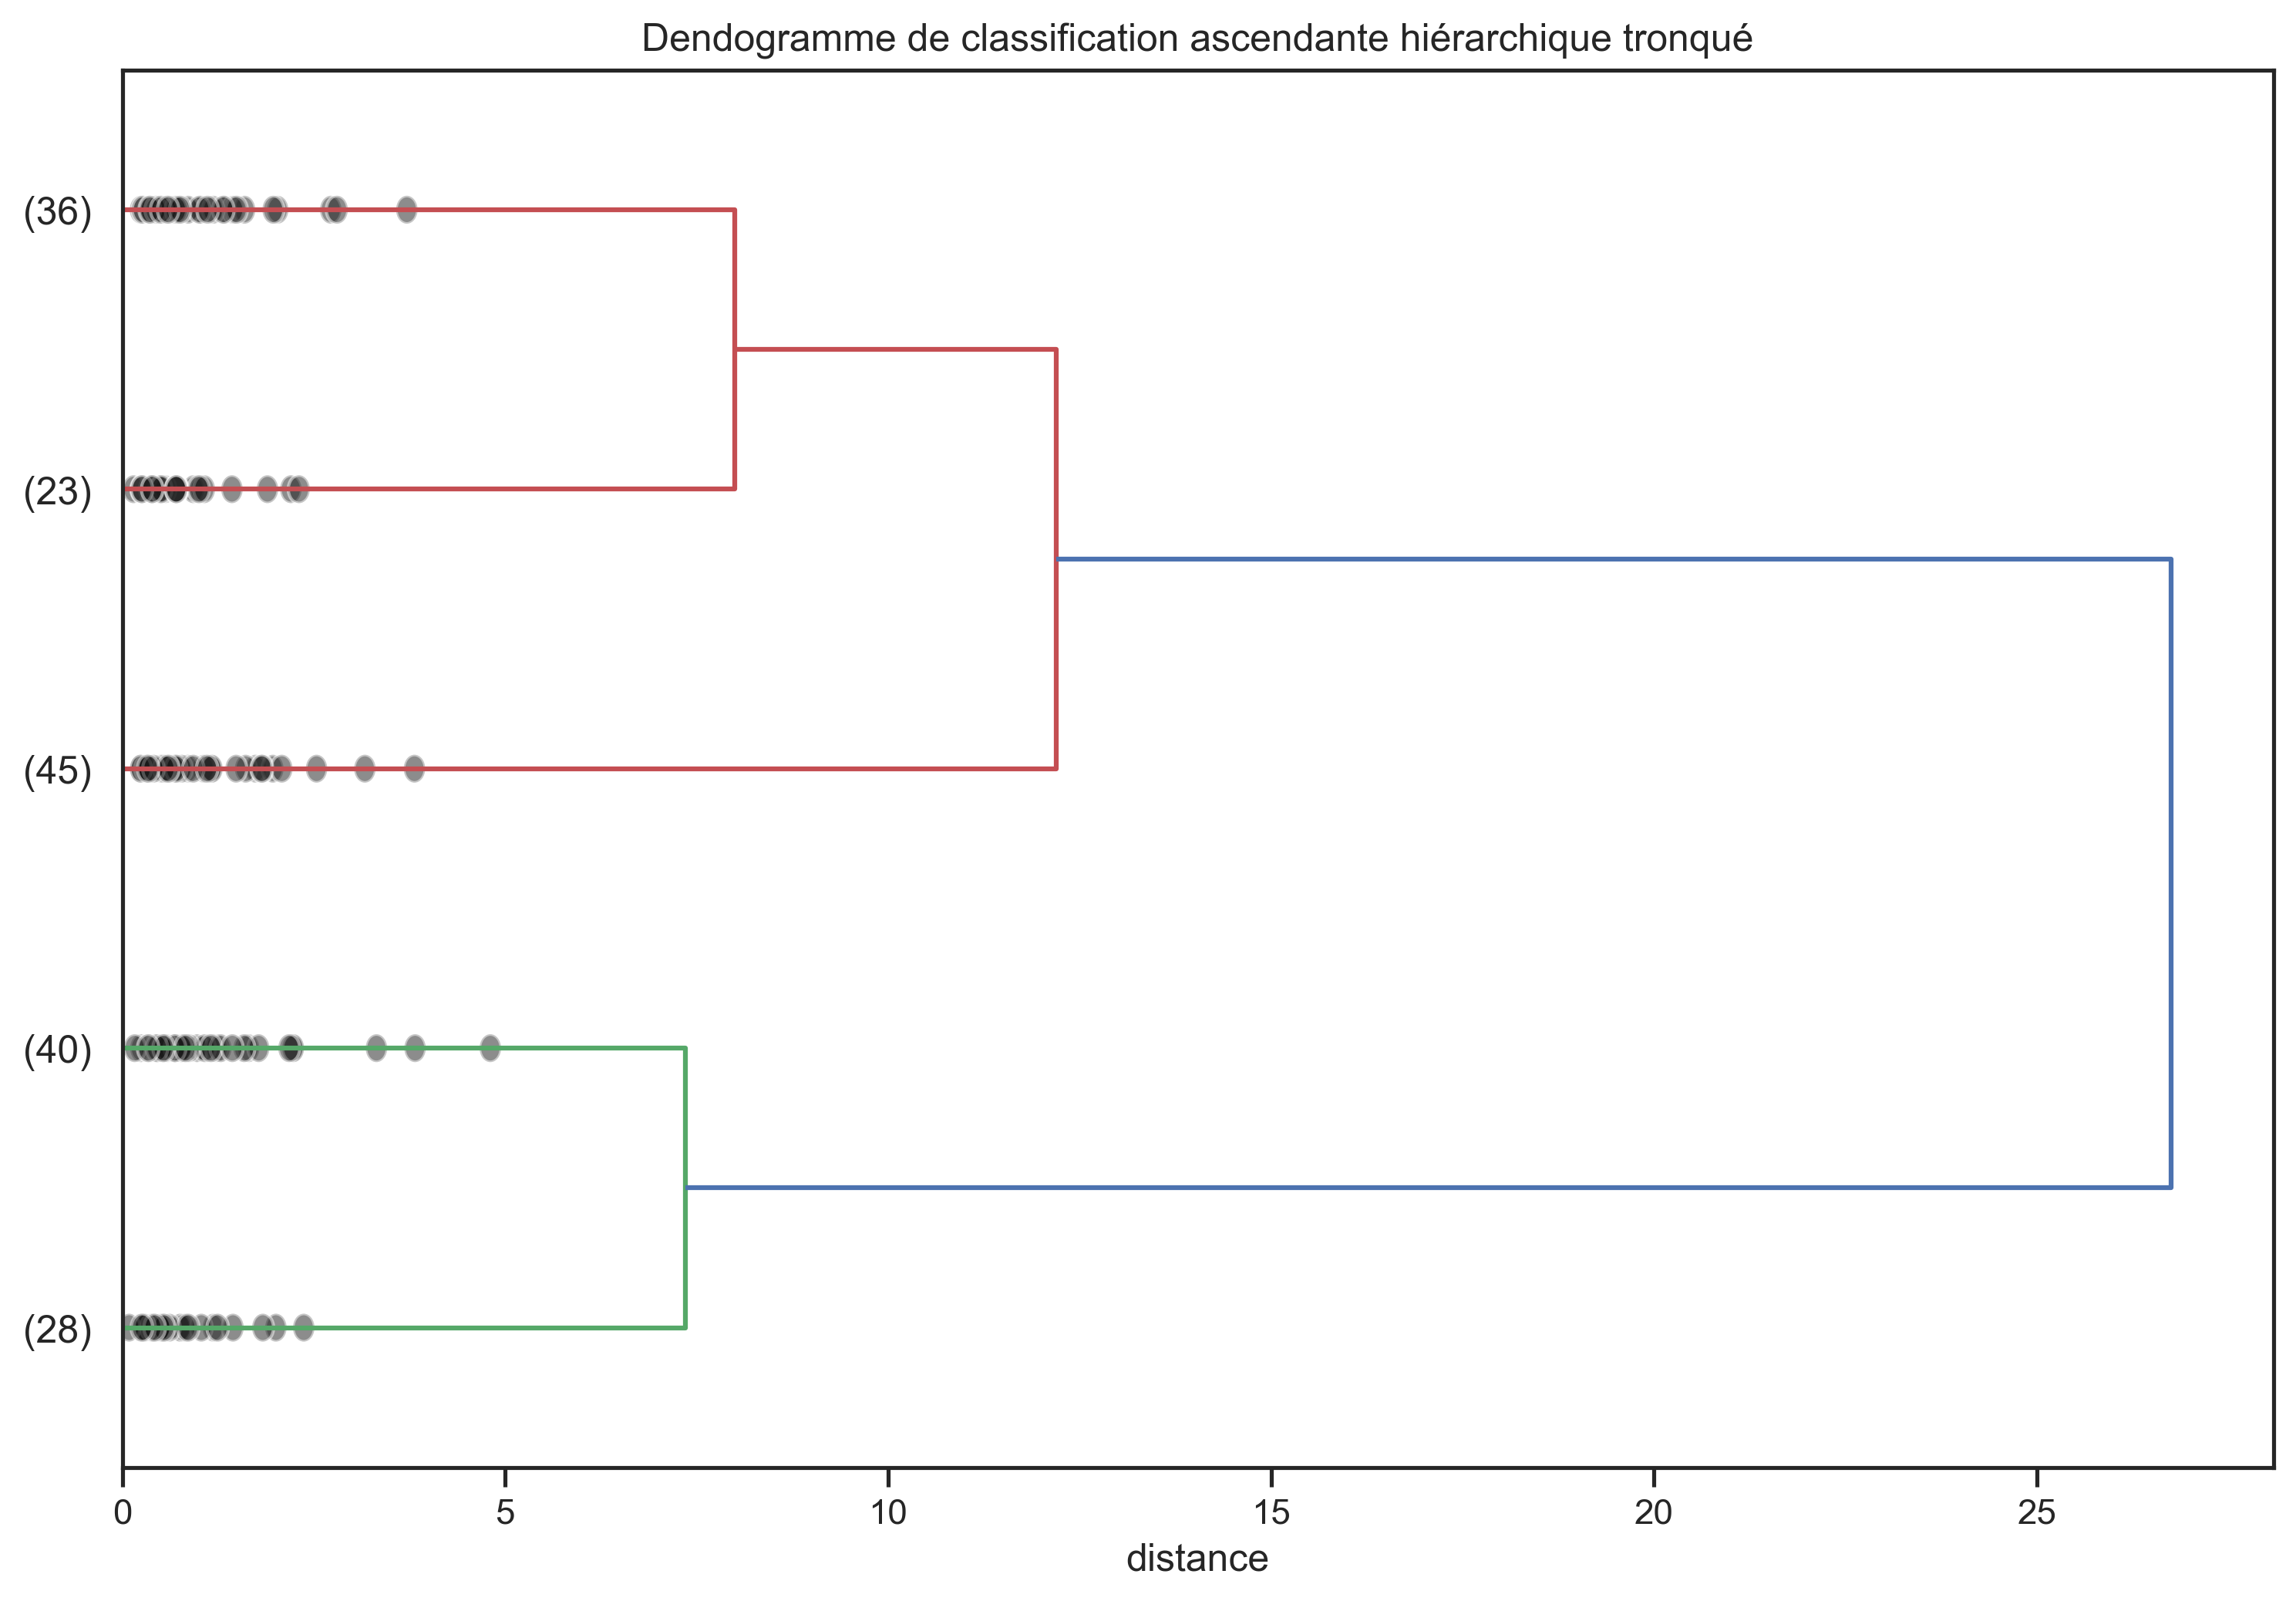

In [9]:
plt.figure(figsize=(12,8), dpi=300)
plt.title('Dendogramme de classification ascendante hiérarchique tronqué')
plt.xlabel('distance')
plt.grid(False)
dendrogram(
    Z,
    truncate_mode='lastp',
    p = 5,
    labels = pays,
    orientation = "right",
    show_contracted=True,
)
plt.savefig('exports/dendogram_CAH_truncated_1.png')
plt.show()

### <span style = "color:blue" id="group">Attribution des 5 groupes et World map de répartition</span>

In [10]:
# Coupage du dendrogramme en 5 clusters avec Scipy
clusters_cah = fcluster(Z, 5, criterion='maxclust')

#index triés des groupes
idg = np.argsort(clusters_cah)

#affichage des pays et leurs groupes
df_groupage_1 = pd.DataFrame(columns=["Cluster","Zone"])
df_groupage_1["Zone"] = df_bilans_fao_clus.index[idg]
df_groupage_1["Cluster"] = clusters_cah[idg]
df_groupage_1.head()

,Cluster,Zone
0,1,Niger
1,1,Bénin
2,1,Libéria
3,1,Mozambique
4,1,Kenya


In [11]:
# Jointure pour ajout des groupes dans le dataframe principal
df_bilans_fao = pd.merge(df_bilans_fao, df_groupage_1, on="Zone")

# Export pour création de la carte Geopandas dans environnement Anaconda adéquat
df_bilans_fao.to_csv('datas/bilan_fao_1.csv', index=False)

df_bilans_fao.sample(5)

,Zone,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster
39,Égypte,59,2017,96442591.0,4.327,1212165.0,35160.45,24.997,4
56,Guatemala,89,2017,16914970.0,4.077,930385.0,25506.20,30.810,2
44,France,68,2017,64842509.0,0.604,1298670.0,40912.85,62.164,3
66,Indonésie,101,2017,264650963.0,2.426,1055580.0,25049.95,32.333,2
141,Eswatini,209,2017,1124805.0,1.880,877825.0,22381.80,29.534,2


In [12]:
df_bilans_fao.shape

(172, 9)

![geomap-dendo_1](exports/geo_dendogram_1.jpeg)

Les couleurs de la carte ne sont pas forcement **identiques à celles du Dendogramme** pour la première répartition. *(Carte réalisée avec la librairie Geopandas)*

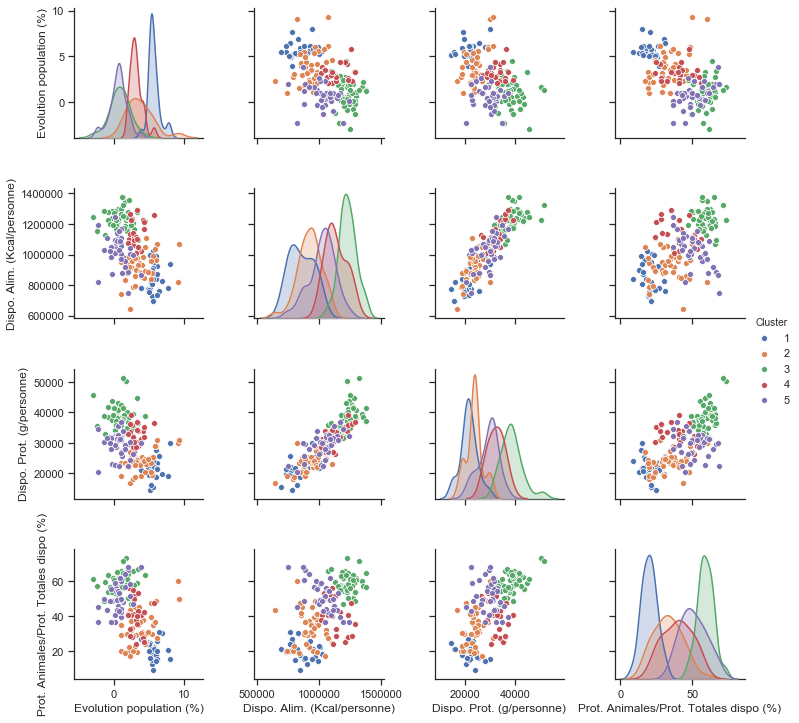

In [13]:
# Pairplot avec coloration des groupes
sns.pairplot(df_bilans_fao[["Evolution population (%)", "Dispo. Alim. (Kcal/personne)",
                            "Dispo. Prot. (g/personne)","Prot. Animales/Prot. Totales dispo (%)", "Cluster"]], hue="Cluster")

### <span style = "color:blue" id="boxplot">Visualisation en Boxplots des variables par Cluster</span>

In [14]:
df_bilans_fao_box = df_bilans_fao.sort_values("Cluster")

def boxplot_cluster(var):
    data_boxplot = []
    groupes_pays = df_bilans_fao_box["Cluster"].unique()
    
    for groupe in groupes_pays :
        subset = df_bilans_fao_box[df_bilans_fao_box.Cluster == groupe]
        data_boxplot.append(subset[var])

    fig, ax1 = plt.subplots(figsize=(12, 8))
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data_boxplot, notch=0, vert=1, whis=1.5)

    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.4)
    ax1.set_axisbelow(True)
    ax1.set_title(("Distribution de " + var +" par Cluster"), fontsize=22)
    ax1.set_ylabel(var)
    ax1.set_xlabel("Cluster")
    ax1.set_xlim(0, len(data_boxplot) + 0.5)

    plt.show()

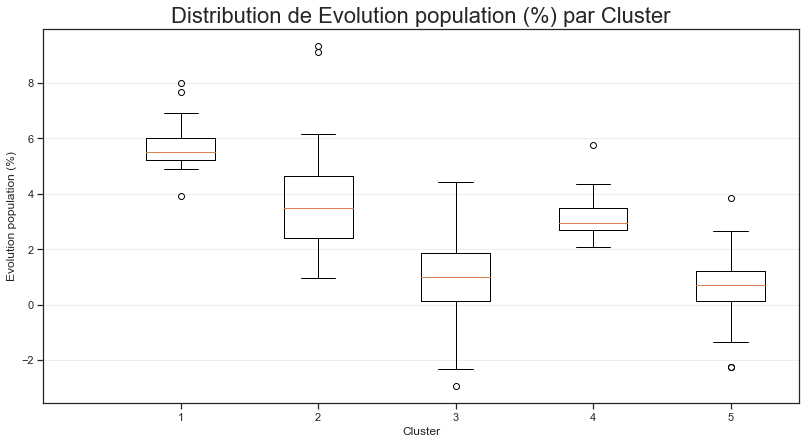

In [15]:
boxplot_cluster('Evolution population (%)')    

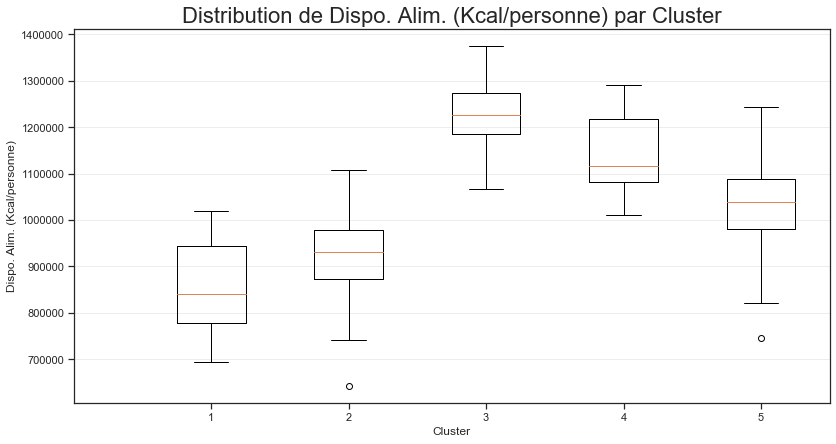

In [16]:
boxplot_cluster('Dispo. Alim. (Kcal/personne)') 

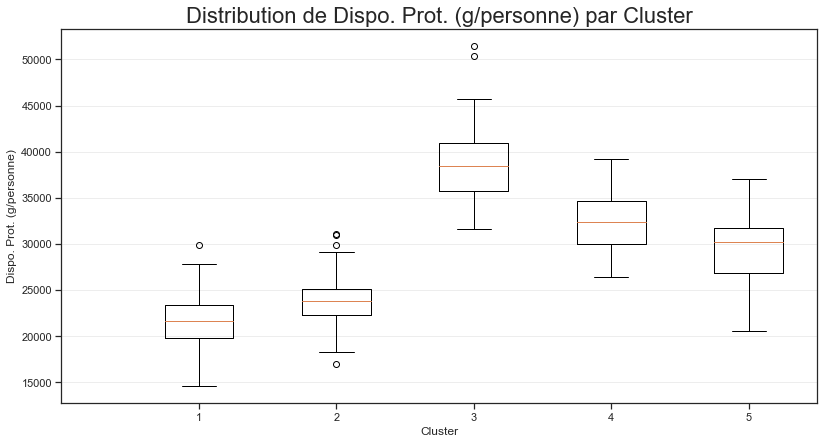

In [17]:
boxplot_cluster('Dispo. Prot. (g/personne)') 

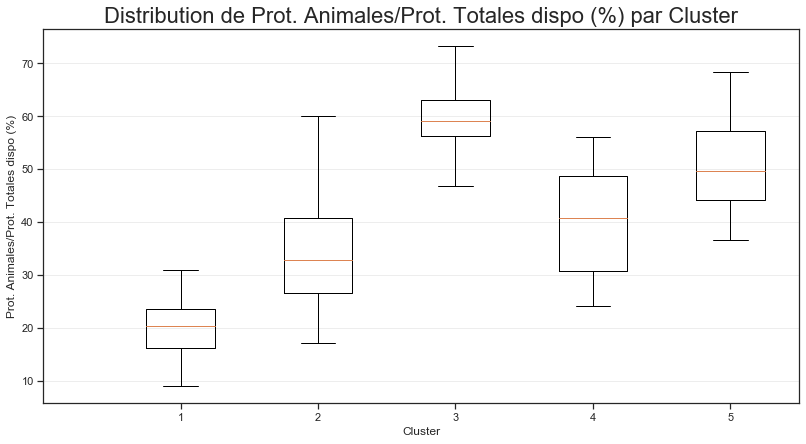

In [18]:
boxplot_cluster('Prot. Animales/Prot. Totales dispo (%)') 

### <span style = "color:blue" id="selectcah1">Première sélection des pays via CAH sur bilans alimentaires</span>

<div class="alert alert-block alert-info">
    Pour l'export de nos poulets, les pays les plus intéressants doivent posséder les propriétés du bilan alimentaire suivantes :
    <ul>
        <li><b>Une évolution importante de la population <em>(Bonne croissance démographique)</em>;</b></li>
        <li><b>Une disponibilité alimentaire trop faible pour couvrir cette croissance;</b></li>
        <li><b>Un ratio de protéines animales / protéines totales faible.</b></li>
    </ul>
    <p>Les boxplots ci-dessus nous indiquent que les <b>groupes 1 et 2</b> correspondent à ces indicateurs.</p>
</div>

In [19]:
df_select_pays_cah = df_bilans_fao[df_bilans_fao["Cluster"].isin([1,2]) == True]
df_select_pays_cah

,Zone,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster
1,Afghanistan,2,2017,36296113.0,5.470,730000.0,19742.85,19.505,1
4,Angola,7,2017,29816766.0,6.930,828550.0,19750.15,30.456,1
11,Bangladesh,16,2017,159685424.0,2.195,947540.0,22002.20,19.841,2
12,Bolivie (État plurinational de),19,2017,11192855.0,2.973,859210.0,24987.90,45.370,2
13,Botswana,20,2017,2205080.0,3.978,854100.0,23790.70,40.580,2
...,...,...,...,...,...,...,...,...,...
158,Burkina Faso,233,2017,19193234.0,5.978,992800.0,27787.45,14.370,1
163,Éthiopie,238,2017,106399924.0,5.518,840960.0,23962.25,8.911,1
165,Yémen,249,2017,27834819.0,5.045,752995.0,19428.95,20.026,1
166,Zambie,251,2017,16853599.0,6.135,734745.0,21567.85,19.783,1


## <span style="color:orange" id="kmeans">Comparaison avec le Kmeans</span>

### <span style = "color:blue" id="kmeans1">Kmeans sur les données centrées réduites</span>

In [20]:
# Nombre de clusters souhaités
n_clust = 5
# Clustering par K-means avec librairie sklearn sur les données centrées réduites
km = KMeans(n_clusters=n_clust)
km.fit(X_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
# Récupération des clusters attribués à chaque individu
clusters_km = km.labels_
clusters_km

array([2, 0, 1, 2, 0, 4, 1, 1, 1, 4, 4, 3, 3, 3, 1, 3, 0, 4, 4, 0, 1, 3,
       3, 3, 0, 2, 2, 4, 0, 4, 2, 4, 2, 0, 1, 4, 4, 1, 3, 2, 3, 1, 4, 1,
       1, 1, 3, 4, 0, 0, 1, 1, 0, 4, 1, 4, 3, 0, 4, 3, 3, 1, 1, 1, 1, 3,
       3, 2, 0, 1, 1, 1, 0, 1, 4, 4, 0, 2, 0, 3, 3, 1, 2, 1, 2, 3, 3, 0,
       1, 1, 0, 0, 4, 0, 0, 1, 0, 4, 2, 4, 2, 0, 4, 3, 3, 1, 4, 4, 0, 1,
       3, 0, 0, 1, 3, 4, 1, 4, 3, 3, 1, 1, 0, 3, 3, 1, 0, 1, 4, 4, 4, 3,
       2, 0, 0, 1, 4, 2, 1, 3, 0, 3, 1, 1, 2, 4, 0, 4, 0, 4, 0, 2, 2, 2,
       0, 1, 4, 1, 0, 4, 2, 4, 2, 0, 4, 0, 0, 1, 1, 4, 1, 0])

### <span style = "color:blue" id="eboulis">ACP - Eboulis des valeurs propres</span>

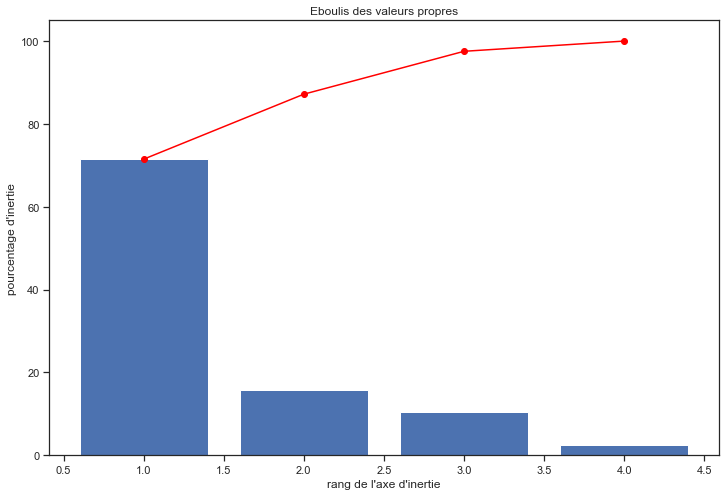

In [22]:
# Affichage du clustering par projection des individus sur les 2 plans factoriels.
pca = decomposition.PCA().fit(X_cr) #sklearn
X_projected = pca.transform(X_cr)

# Eboulis des valeurs propres
varexpl = pca.explained_variance_ratio_*100
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [23]:
print(varexpl)

[71.48686718 15.69113807 10.35463757  2.46735717]


On remarque ici que **l'inertie totale sur le premier plan factoriel *(F1 et F2)* est égale à 87,2%** (71,5 + 15,7). Une analyse sur ce premier plan factoriel sera donc satisfaisante.

### <span style = "color:blue" id="ccorr">ACP - Cercle des corrélations</span>

In [22]:
def cerle_corr(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            #fig, ax = plt.subplots(figsize=(12,(n_comp*2)))
            #ax.set_aspect('equal', adjustable='box')
            fig=plt.figure(figsize=(12,12))
            fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=fig.add_subplot(111)
            ax.set_aspect('equal', adjustable='box')

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            else :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
        
            # affichage des flèches
            plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

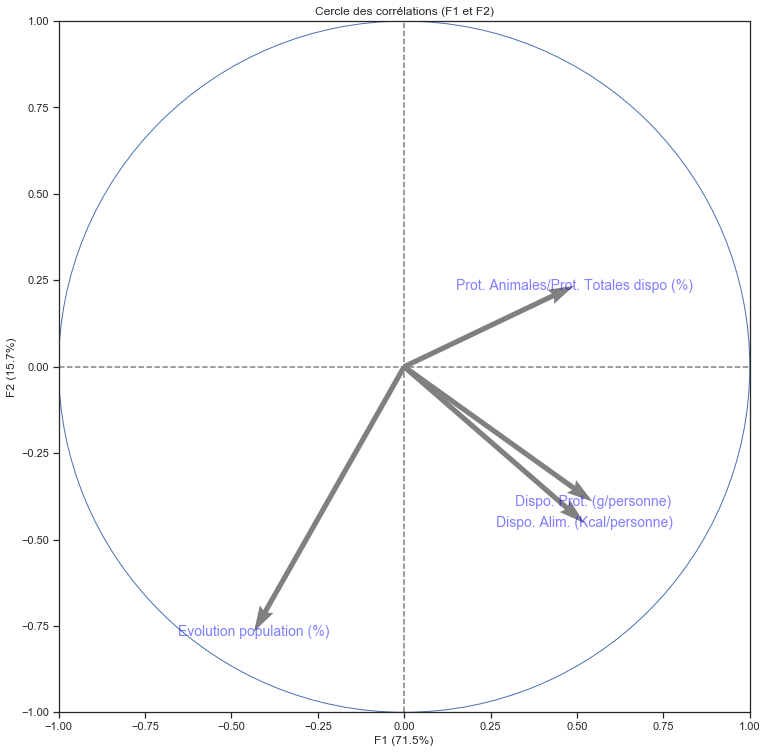

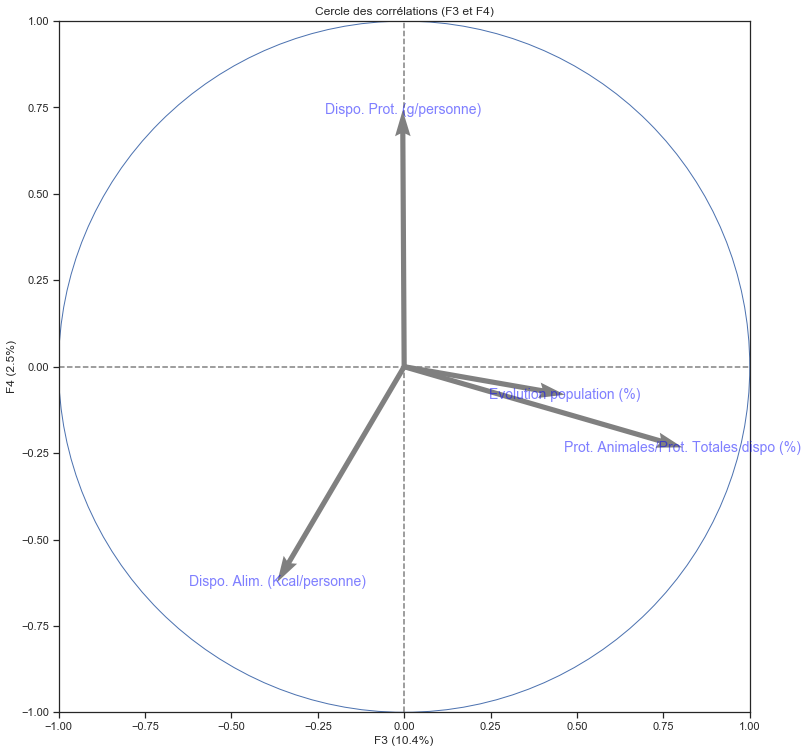

In [25]:
pcs = pca.components_
cerle_corr(pcs, 4, pca, [(0,1),(2,3)], labels = np.array(df_bilans_fao_clus.columns))

Les variables les plus corrélées à F1 sont la disponibilité en protéines, la disponibilité en Kcal (qui sont d'ailleurs très fortement corrélées entre elles) et le ratio de protéines animales sur les protéines totales. **La composante principale F1 *(variable synthétique)* représente donc bien le bilan énergétique**.
Pour la composante F2, l'évolution de la population est anti-corrélée à la proportion protéines animales / protéines totales. **Cet axe peut donc représenter les données démographiques**.

On peut d'ailleurs calculer les valeurs de ces variables synthétiques F1, F2, F3 et F4 qui pourraient remplacer les autres variables :

In [26]:
df_var_syn = pd.DataFrame(X_projected, index=df_bilans_fao['Zone'], columns=["F"+str(i+1) for i in range(4)])
df_var_syn.head()

,F1,F2,F3,F4
Zone,,,,
Arménie,1.148181,0.159486,-0.413107,0.315023
Afghanistan,-2.978391,0.095360,0.107680,0.422107
Albanie,2.583722,-0.158482,-0.363547,0.576641
Algérie,0.119227,-1.457472,-0.840409,-0.080082
Angola,-2.602849,-0.496920,0.735732,-0.160427


### <span style = "color:blue" id="facto">Projection sur les plans factoriels</span>

In [27]:
# Affichage sur plusieurs plans factoriels avec inertie des axes.
def plot_plans_factoriels(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None, centroid=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(12,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Affichage des positions des centres de classes
            if centroid is not None:
                centroids = km.cluster_centers_
                centroids_projected = pca.transform(centroids)
                for j,(x1,y1) in enumerate(centroids_projected[:,[d1,d2]]):
                    plt.scatter(x1,y1, c = 'red', marker='x', s=100, label="Centroides")
            
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des {} individus sur F{} et F{}".format(X_projected.shape[0], d1+1, d2+1), fontsize=22)
            plt.show(block=False)

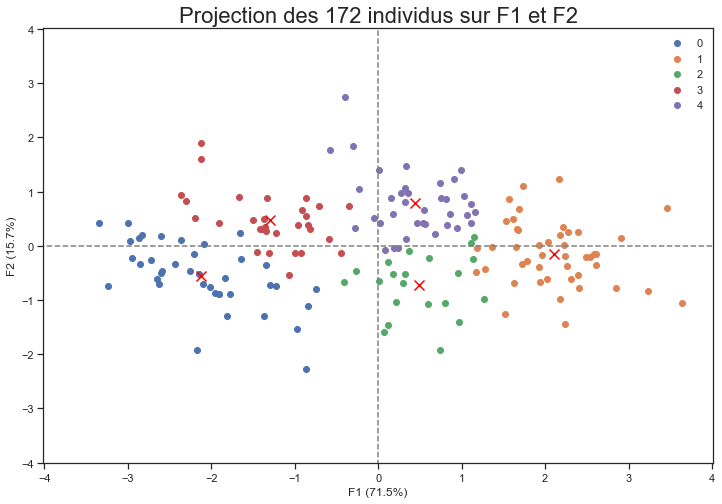

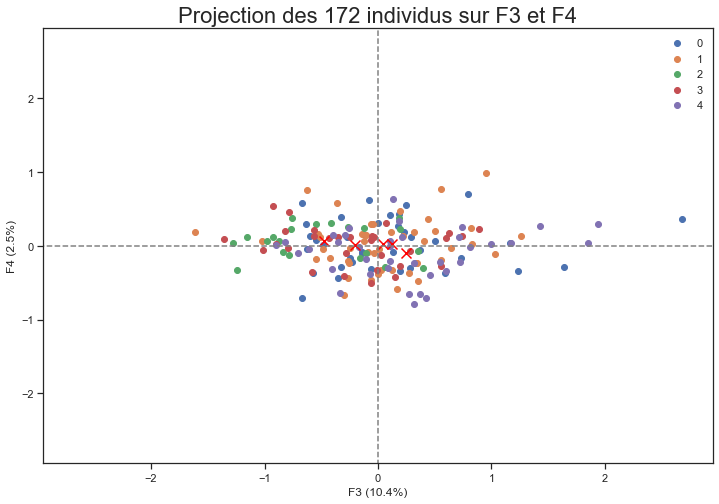

In [28]:
plot_plans_factoriels(X_projected, 4, pca, [(0,1),(2,3)], illustrative_var = clusters_km, centroid=1)

### <span style = "color:blue" id="kmeans2">Méthode des centres mobiles <em>(aide à la détection du meilleur K)</em></span>

In [16]:
#librairie pour évaluation des partitions
from sklearn import metrics

In [31]:
#faire varier le nombre de clusters de 2 à 15 avec la méthode des silhouettes
res = np.arange ( 14, dtype ="double" )
for k in np.arange(14):
    kms = KMeans(n_clusters = k+2)
    kms.fit(X_cr)
    res[k] = metrics.silhouette_score(X_cr, kms.labels_)
print(res)

[0.43558807 0.32297574 0.32454242 0.28659597 0.29109048 0.26397912
 0.26683535 0.26521432 0.27016261 0.2472905  0.25782339 0.24047066
 0.23498149 0.23696338]


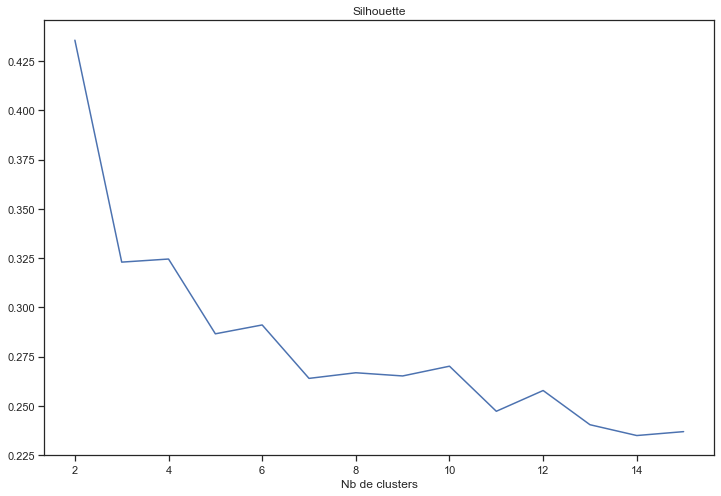

In [32]:
plt.figure(figsize=(12,8))
plt.title("Silhouette")
plt.xlabel("Nb de clusters")
plt.plot(np.arange(2,16,1), res)
plt.show()

On remarque que **le nombre de 5 Clusters n'est pas idéal pour le Kmeans**. La meilleure alternative serait 2 Clusters. Si l'on veut partitionner un peu plus, il faudrait considérer un K = 3 ou 4.

## <span style="color:orange" id="interp">Interprétation des Clusters</span>

### <span style = "color:blue" id="moykm">Moyennes conditionnelles et effectifs.</span>

In [33]:
#correspondance avec les groupes de la CAH
pd.crosstab(clusters_cah,km.labels_)

col_0,0,1,2,3,4
row_0,,,,,
1,27,0,0,1,0
2,12,0,0,28,0
3,0,44,1,0,0
4,0,0,17,1,5
5,0,1,3,0,32


On remarque que les groupes de la CAH sont **bien répartis comparativement aux groupes du Kmeans** avec tout de même quelques différences. 

In [34]:
df_bilans_fao['Clusterkm'] = clusters_km

In [35]:
# effectifs conditionnel sur Kmeans
gb = df_bilans_fao.groupby('Clusterkm')
nk = gb.size()
print(nk)

Clusterkm
0    39
1    45
2    21
3    30
4    37
dtype: int64


In [36]:
# Moyennes conditionnelles
mk = gb.mean()
mk = mk[['Evolution population (%)','Dispo. Alim. (Kcal/personne)','Dispo. Prot. (g/personne)','Prot. Animales/Prot. Totales dispo (%)']]
mk

,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%)
Clusterkm,,,,
0,5.842692,8.920226e+05,22853.211538,25.486949
1,0.780422,1.231770e+06,38660.962222,59.140200
2,2.863143,1.162977e+06,34062.669048,37.478857
3,2.853967,9.084120e+05,23211.931667,31.684000
4,1.050297,1.017433e+06,28621.820270,52.548541


### <span style = "color:blue" id="boxkm">Boxplots sur les variables et variables synthétiques.</span>

In [37]:
# Ajout des variables synthétiques F1 et F2
df_bilans_fao_boxkm = pd.merge(df_bilans_fao, df_var_syn, on="Zone", how="left")
df_bilans_fao_boxkm = df_bilans_fao_boxkm.sort_values("Clusterkm")
df_bilans_fao_boxkm.head()

,Zone,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster,Clusterkm,F1,F2,F3,F4
171,Soudan,276,2017,40813397.0,4.911,888045.0,24776.20,31.128,2,0,-1.642895,-0.248257,0.229262,0.182982
146,République-Unie de Tanzanie,215,2017,54660339.0,6.172,874540.0,21819.70,15.624,1,0,-2.620137,-0.699998,-0.270119,0.118866
33,Bénin,53,2017,11175198.0,5.666,1005940.0,23520.60,22.331,1,0,-1.777485,-0.883761,-0.325408,-0.285700
140,Tadjikistan,208,2017,8880268.0,5.042,767960.0,20217.35,24.282,1,0,-2.595625,0.178240,0.178775,0.271765
134,Sierra Leone,197,2017,7488423.0,4.413,893885.0,20323.20,23.851,2,0,-2.085833,0.029756,-0.249178,-0.164091


In [38]:
def boxplot_cluster_km(var):
    data_boxplot = []
    groupes_pays = df_bilans_fao_boxkm["Clusterkm"].unique()
    
    for groupe in groupes_pays :
        subset = df_bilans_fao_boxkm[df_bilans_fao_boxkm.Clusterkm == groupe]
        data_boxplot.append(subset[var])

    fig, ax1 = plt.subplots(figsize=(12, 8))
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data_boxplot, notch=0, vert=1, whis=1.5, labels=["0", "1", "2", "3", "4"])

    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.4)
    ax1.set_axisbelow(True)
    ax1.set_title(("Distribution de " + var +" par Cluster Kmeans"), fontsize=22)
    ax1.set_ylabel(var)
    ax1.set_xlabel("Cluster")
    ax1.set_xlim(0, len(data_boxplot) + 0.5)

    plt.show()

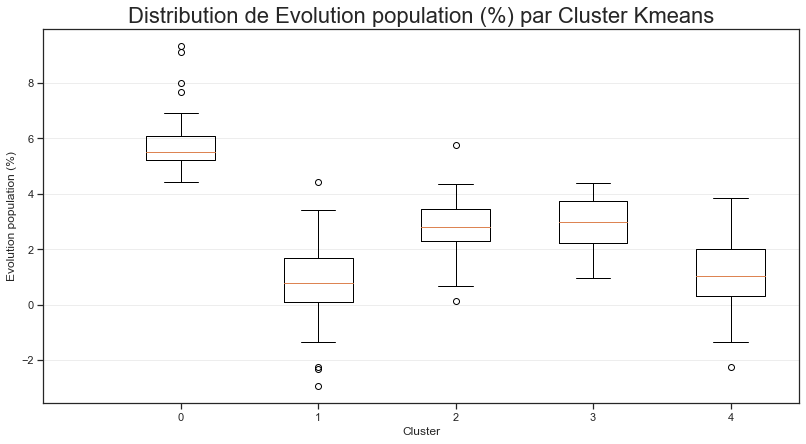

In [39]:
boxplot_cluster_km('Evolution population (%)')

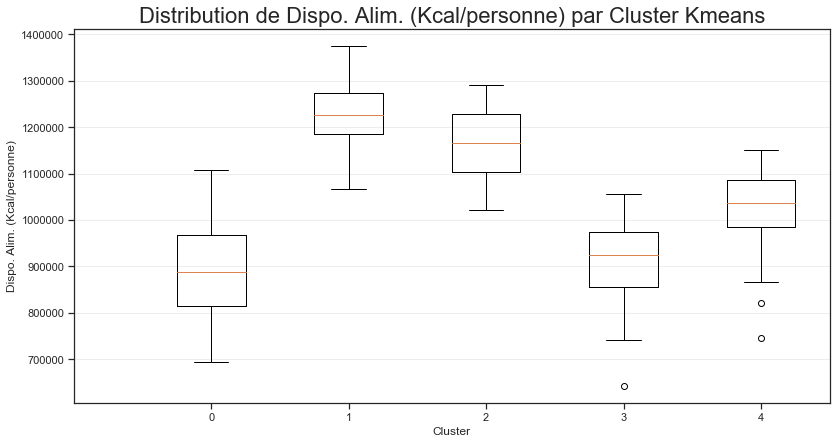

In [40]:
boxplot_cluster_km('Dispo. Alim. (Kcal/personne)')

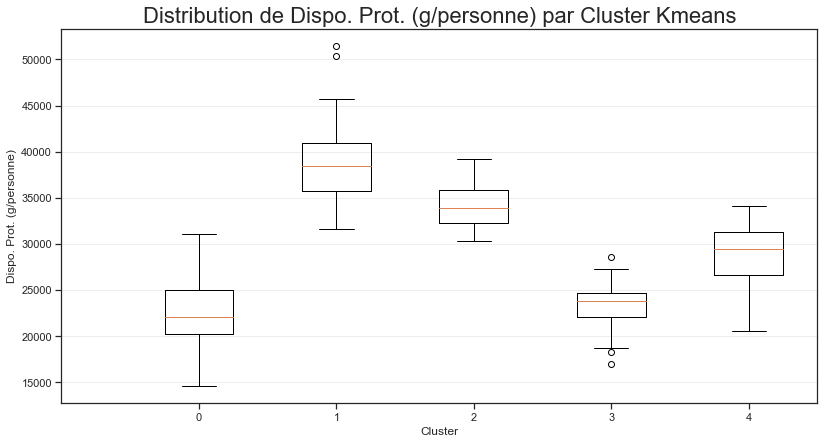

In [41]:
boxplot_cluster_km('Dispo. Prot. (g/personne)')

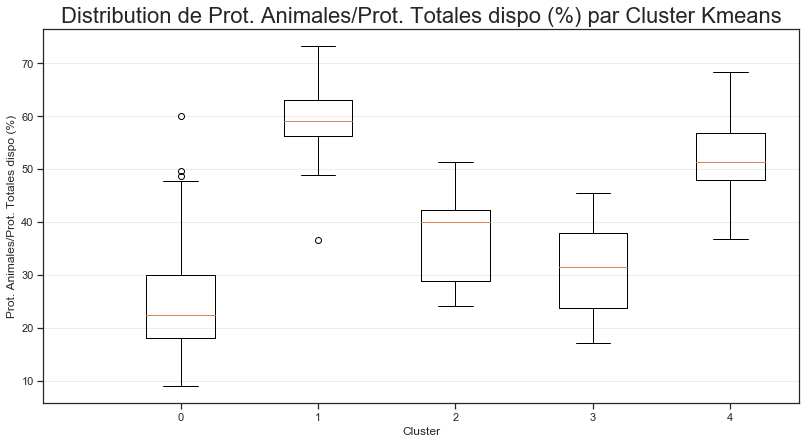

In [42]:
boxplot_cluster_km('Prot. Animales/Prot. Totales dispo (%)')

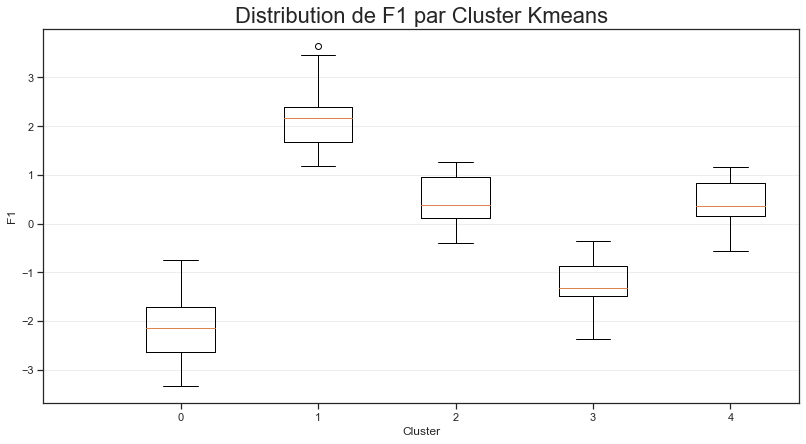

In [43]:
boxplot_cluster_km('F1')

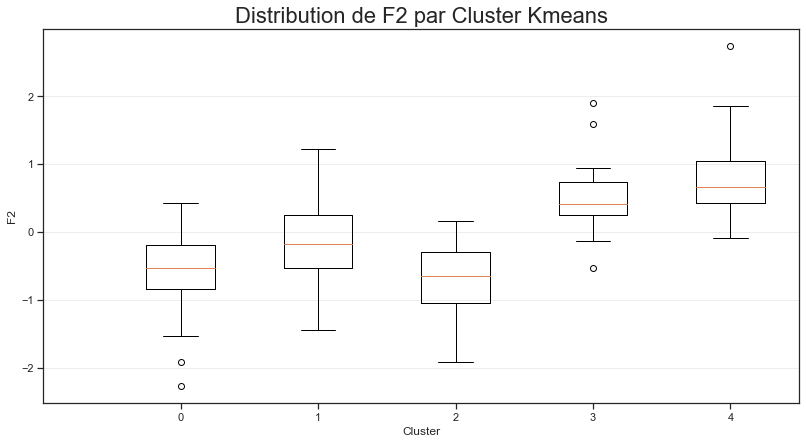

In [44]:
boxplot_cluster_km('F2')

<div class="alert alert-block alert-info">
    En se basant sur les mêmes critères que lors de la sélection des pays par CAH (évolution importante de la population et bilan alimentaire trop faible), <b>les clusters Kmeans à selectionner sont ceux dont le F1 est inférieur à -1</b>, soit : 
</div>

### <span style = "color:blue" id="selectkm">Sélections des pays sur clusters Kmeans.</span>

In [45]:
select_clusters_kmeans = df_bilans_fao_boxkm.groupby("Clusterkm").mean().reset_index()
select_clusters_kmeans = select_clusters_kmeans[select_clusters_kmeans["F1"]<-1]["Clusterkm"].unique()
select_clusters_kmeans

array([0, 3], dtype=int64)

In [46]:
df_select_pays_kmeans = df_bilans_fao[df_bilans_fao["Clusterkm"].isin(select_clusters_kmeans)]
df_select_pays_kmeans

,Zone,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster,Clusterkm
1,Afghanistan,2,2017,36296113.0,5.470,730000.0,19742.85,19.505,1,0
4,Angola,7,2017,29816766.0,6.930,828550.0,19750.15,30.456,1,0
11,Bangladesh,16,2017,159685424.0,2.195,947540.0,22002.20,19.841,2,3
12,Bolivie (État plurinational de),19,2017,11192855.0,2.973,859210.0,24987.90,45.370,2,3
13,Botswana,20,2017,2205080.0,3.978,854100.0,23790.70,40.580,2,3
...,...,...,...,...,...,...,...,...,...,...
158,Burkina Faso,233,2017,19193234.0,5.978,992800.0,27787.45,14.370,1,0
163,Éthiopie,238,2017,106399924.0,5.518,840960.0,23962.25,8.911,1,0
165,Yémen,249,2017,27834819.0,5.045,752995.0,19428.95,20.026,1,0
166,Zambie,251,2017,16853599.0,6.135,734745.0,21567.85,19.783,1,0


### <span style = "color:blue" id="compar">Comparaison des pays obtenus sur les 2 méthodes.</span>

Le Kmeans nous a permis de faire une sélection plus précise des pays. Nous allons tout de même vérifier les différences entre les 2 classifications pour faire la meilleure sélection possible :

In [47]:
df_compare_1 = pd.merge(df_select_pays_cah[['Zone','Cluster']], df_select_pays_kmeans[['Zone','Clusterkm']],
                     on='Zone', how='outer')

In [48]:
liste_verif_1 = df_compare_1.loc[((df_compare_1['Clusterkm'].isnull() == True) | (df_compare_1['Cluster'].isnull() == True)),'Zone'].to_list()

In [49]:
df_ajout_1 = df_bilans_fao_boxkm[df_bilans_fao_boxkm["Zone"].isin(liste_verif_1)].sort_values("F1")
df_ajout_1

,Zone,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster,Clusterkm,F1,F2,F3,F4
118,Pérou,170,2017,31444298.0,3.195,1010685.0,28623.3,37.643,4,3,-0.447594,-0.124214,-0.060437,0.073088


In [50]:
df_ajout_1 = df_ajout_1[["Zone","Code zone","Année","Population","Evolution population (%)","Dispo. Alim. (Kcal/personne)",
                         "Dispo. Prot. (g/personne)","Prot. Animales/Prot. Totales dispo (%)","Cluster","Clusterkm"]]

Comme nous ne disposons pas d'assez de variables de comparaison pour cette première analyse, **nous ajouterons ces pays à la première sélection** afin d'analyser plus en détail les variables sociétales.

In [51]:
df_select_pays_kmeans = pd.concat([df_select_pays_kmeans,df_ajout_1]) 

In [52]:
df_select_pays_kmeans

,Zone,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster,Clusterkm
1,Afghanistan,2,2017,36296113.0,5.470,730000.0,19742.85,19.505,1,0
4,Angola,7,2017,29816766.0,6.930,828550.0,19750.15,30.456,1,0
11,Bangladesh,16,2017,159685424.0,2.195,947540.0,22002.20,19.841,2,3
12,Bolivie (État plurinational de),19,2017,11192855.0,2.973,859210.0,24987.90,45.370,2,3
13,Botswana,20,2017,2205080.0,3.978,854100.0,23790.70,40.580,2,3
...,...,...,...,...,...,...,...,...,...,...
158,Burkina Faso,233,2017,19193234.0,5.978,992800.0,27787.45,14.370,1,0
163,Éthiopie,238,2017,106399924.0,5.518,840960.0,23962.25,8.911,1,0
165,Yémen,249,2017,27834819.0,5.045,752995.0,19428.95,20.026,1,0
166,Zambie,251,2017,16853599.0,6.135,734745.0,21567.85,19.783,1,0


In [53]:
# Export pour création de la carte
df_select_pays_kmeans.to_csv('datas/select_pays_kmeans.csv', index=False)

![geodendo2](exports/geo_kmeans_1.jpg)

<div class="alert alert-block alert-warning">
    <b>Attention : </b>Il faut augmenter le nombre de variables décisionnelles pour affiner l'analyse. Les données sociétales ont également une grande importance. Nous allons donc ajouter des données comparatives <b>pour les pays sélectionnés grâce à la CAH puis au Kmeans</b> afin de faire une seconde classification.
</div>

La préparation des données du dataset étendu est réalisée dans le notebook [P5_Préparation_des_données_initiales](P5_Préparation_des_données_initiales.ipynb#extend).

In [54]:
programPause = input("Fin de la première sélection.\nPressez <ENTER> pour continuer vers la classification sur données étendues...")

Fin de la première sélection.
Pressez <ENTER> pour continuer vers la classification sur données étendues...


## <span style="color:orange" id="cah-etendue">Seconde classification sur données étendues</span>

In [2]:
df_donnees_etendues = pd.read_csv('exports/dataset_etendu.csv', header=0, index_col=0, sep=',', decimal='.')
df_donnees_etendues.head()

,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster,Clusterkm,Croissance annuelle PIB US$ (%),PIB Total US$ (Millions),Nombre de têtes réserves volailles,Moyenne prix conso alim ($/mois),Imports viandes / hbts (kg/personne/an),Imports viande volaille / hbts (kg/personne/an),Import volailles / imports viandes (%),Conso volailles 2017 (kg/hbt/an),Evo conso volailles 2015-2017 (%),Elevage volailles / hbts (kg/personne/an)
Zone,,,,,,,,,,,,,,,,,,,
Afghanistan,2,2017,36296113.0,5.470,730000.0,19742.85,19.505,1,0,6.327787,21515.502135,13573000.0,150.712799,0.991842,0.798984,80.555556,1.53,-19.895,0.758153
Angola,7,2017,29816766.0,6.930,828550.0,19750.15,30.456,1,0,20.766647,122123.858628,36500000.0,286.887921,14.086035,9.290075,65.952381,10.56,-19.939,0.901204
Bangladesh,16,2017,159685424.0,2.195,947540.0,22002.20,19.841,2,3,11.491529,245633.488923,329199000.0,155.872191,0.006262,5.003144,53.861553,1.50,3.448,1.217569
Bolivie (État plurinational de),19,2017,11192855.0,2.973,859210.0,24987.90,45.370,2,3,10.511101,37508.683068,223496000.0,159.094602,0.178685,0.089343,50.000000,36.00,2.244,45.037035
Botswana,20,2017,2205080.0,3.978,854100.0,23790.70,40.580,2,3,11.242991,17405.503540,710000.0,134.865894,4.081485,1.360495,33.333333,3.39,11.513,2.086092


In [3]:
# Préparation des données pour le second clustering
df_donnees_etendues_clus = df_donnees_etendues[["Evolution population (%)","Dispo. Alim. (Kcal/personne)","Dispo. Prot. (g/personne)",
                                               "Prot. Animales/Prot. Totales dispo (%)","Croissance annuelle PIB US$ (%)",
                                               "Nombre de têtes réserves volailles","Moyenne prix conso alim ($/mois)",
                                               "Imports viande volaille / hbts (kg/personne/an)",
                                               "Import volailles / imports viandes (%)","Conso volailles 2017 (kg/hbt/an)",
                                               "Evo conso volailles 2015-2017 (%)","Elevage volailles / hbts (kg/personne/an)"]]
df_donnees_etendues_clus.head()

,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Croissance annuelle PIB US$ (%),Nombre de têtes réserves volailles,Moyenne prix conso alim ($/mois),Imports viande volaille / hbts (kg/personne/an),Import volailles / imports viandes (%),Conso volailles 2017 (kg/hbt/an),Evo conso volailles 2015-2017 (%),Elevage volailles / hbts (kg/personne/an)
Zone,,,,,,,,,,,,
Afghanistan,5.470,730000.0,19742.85,19.505,6.327787,13573000.0,150.712799,0.798984,80.555556,1.53,-19.895,0.758153
Angola,6.930,828550.0,19750.15,30.456,20.766647,36500000.0,286.887921,9.290075,65.952381,10.56,-19.939,0.901204
Bangladesh,2.195,947540.0,22002.20,19.841,11.491529,329199000.0,155.872191,5.003144,53.861553,1.50,3.448,1.217569
Bolivie (État plurinational de),2.973,859210.0,24987.90,45.370,10.511101,223496000.0,159.094602,0.089343,50.000000,36.00,2.244,45.037035
Botswana,3.978,854100.0,23790.70,40.580,11.242991,710000.0,134.865894,1.360495,33.333333,3.39,11.513,2.086092


### <span style = "color:blue" id="clust2">Second clustering</span>

In [4]:
import importlib
import functions_cah as fct
importlib.reload(fct)

<module 'functions_cah' from 'C:\\Users\\OpenClassrooms\\jupyter-notebooks\\P5_Produisez_une_étude_de_marché\\functions_cah.py'>

In [5]:
Xf, paysf, std_scalef, X_crf, Zf = fct.centrage_reduction(df_donnees_etendues_clus)

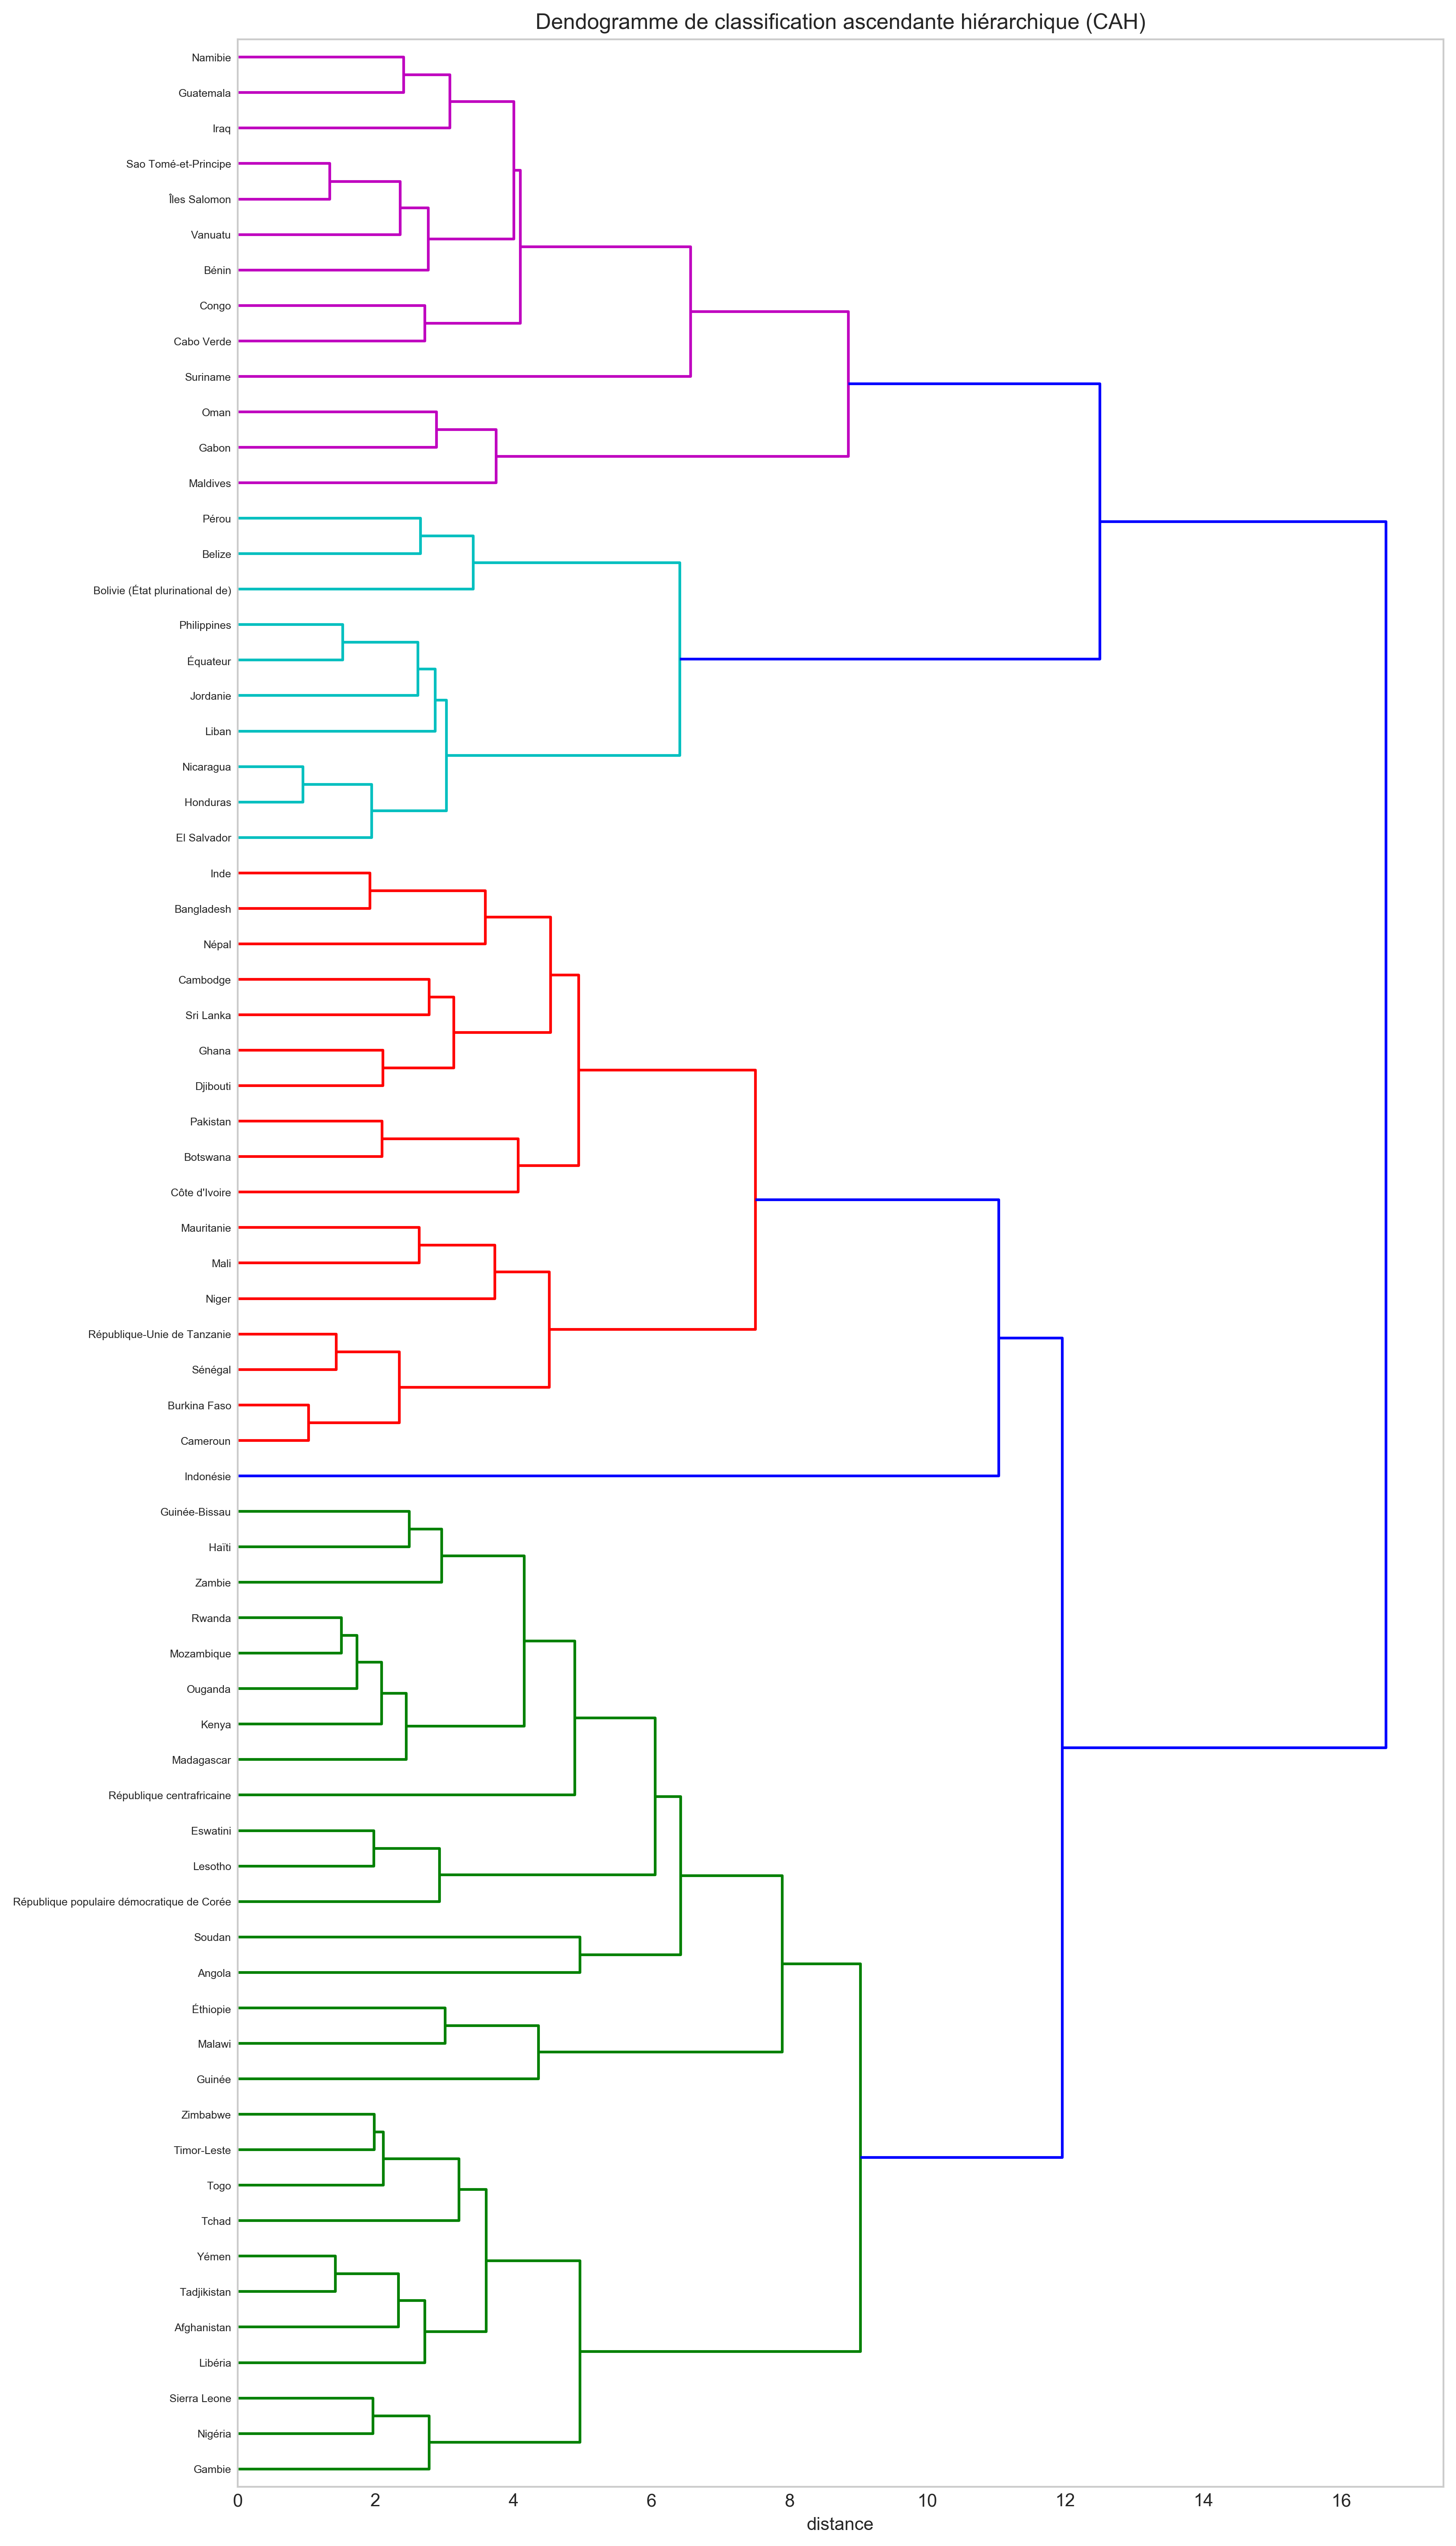

In [6]:
fct.plot_dendogram(Zf=Zf,paysf=paysf,hauteur=10,index=2)

On remarque que **la CAH sur 5 groupes n'a plus vraiment d'interêt sur les données étendues**. Il faut donc augmenter le nombre de groupes en réduisant la hauteur du dendogramme afin d'obtenir un découpage plus fin.

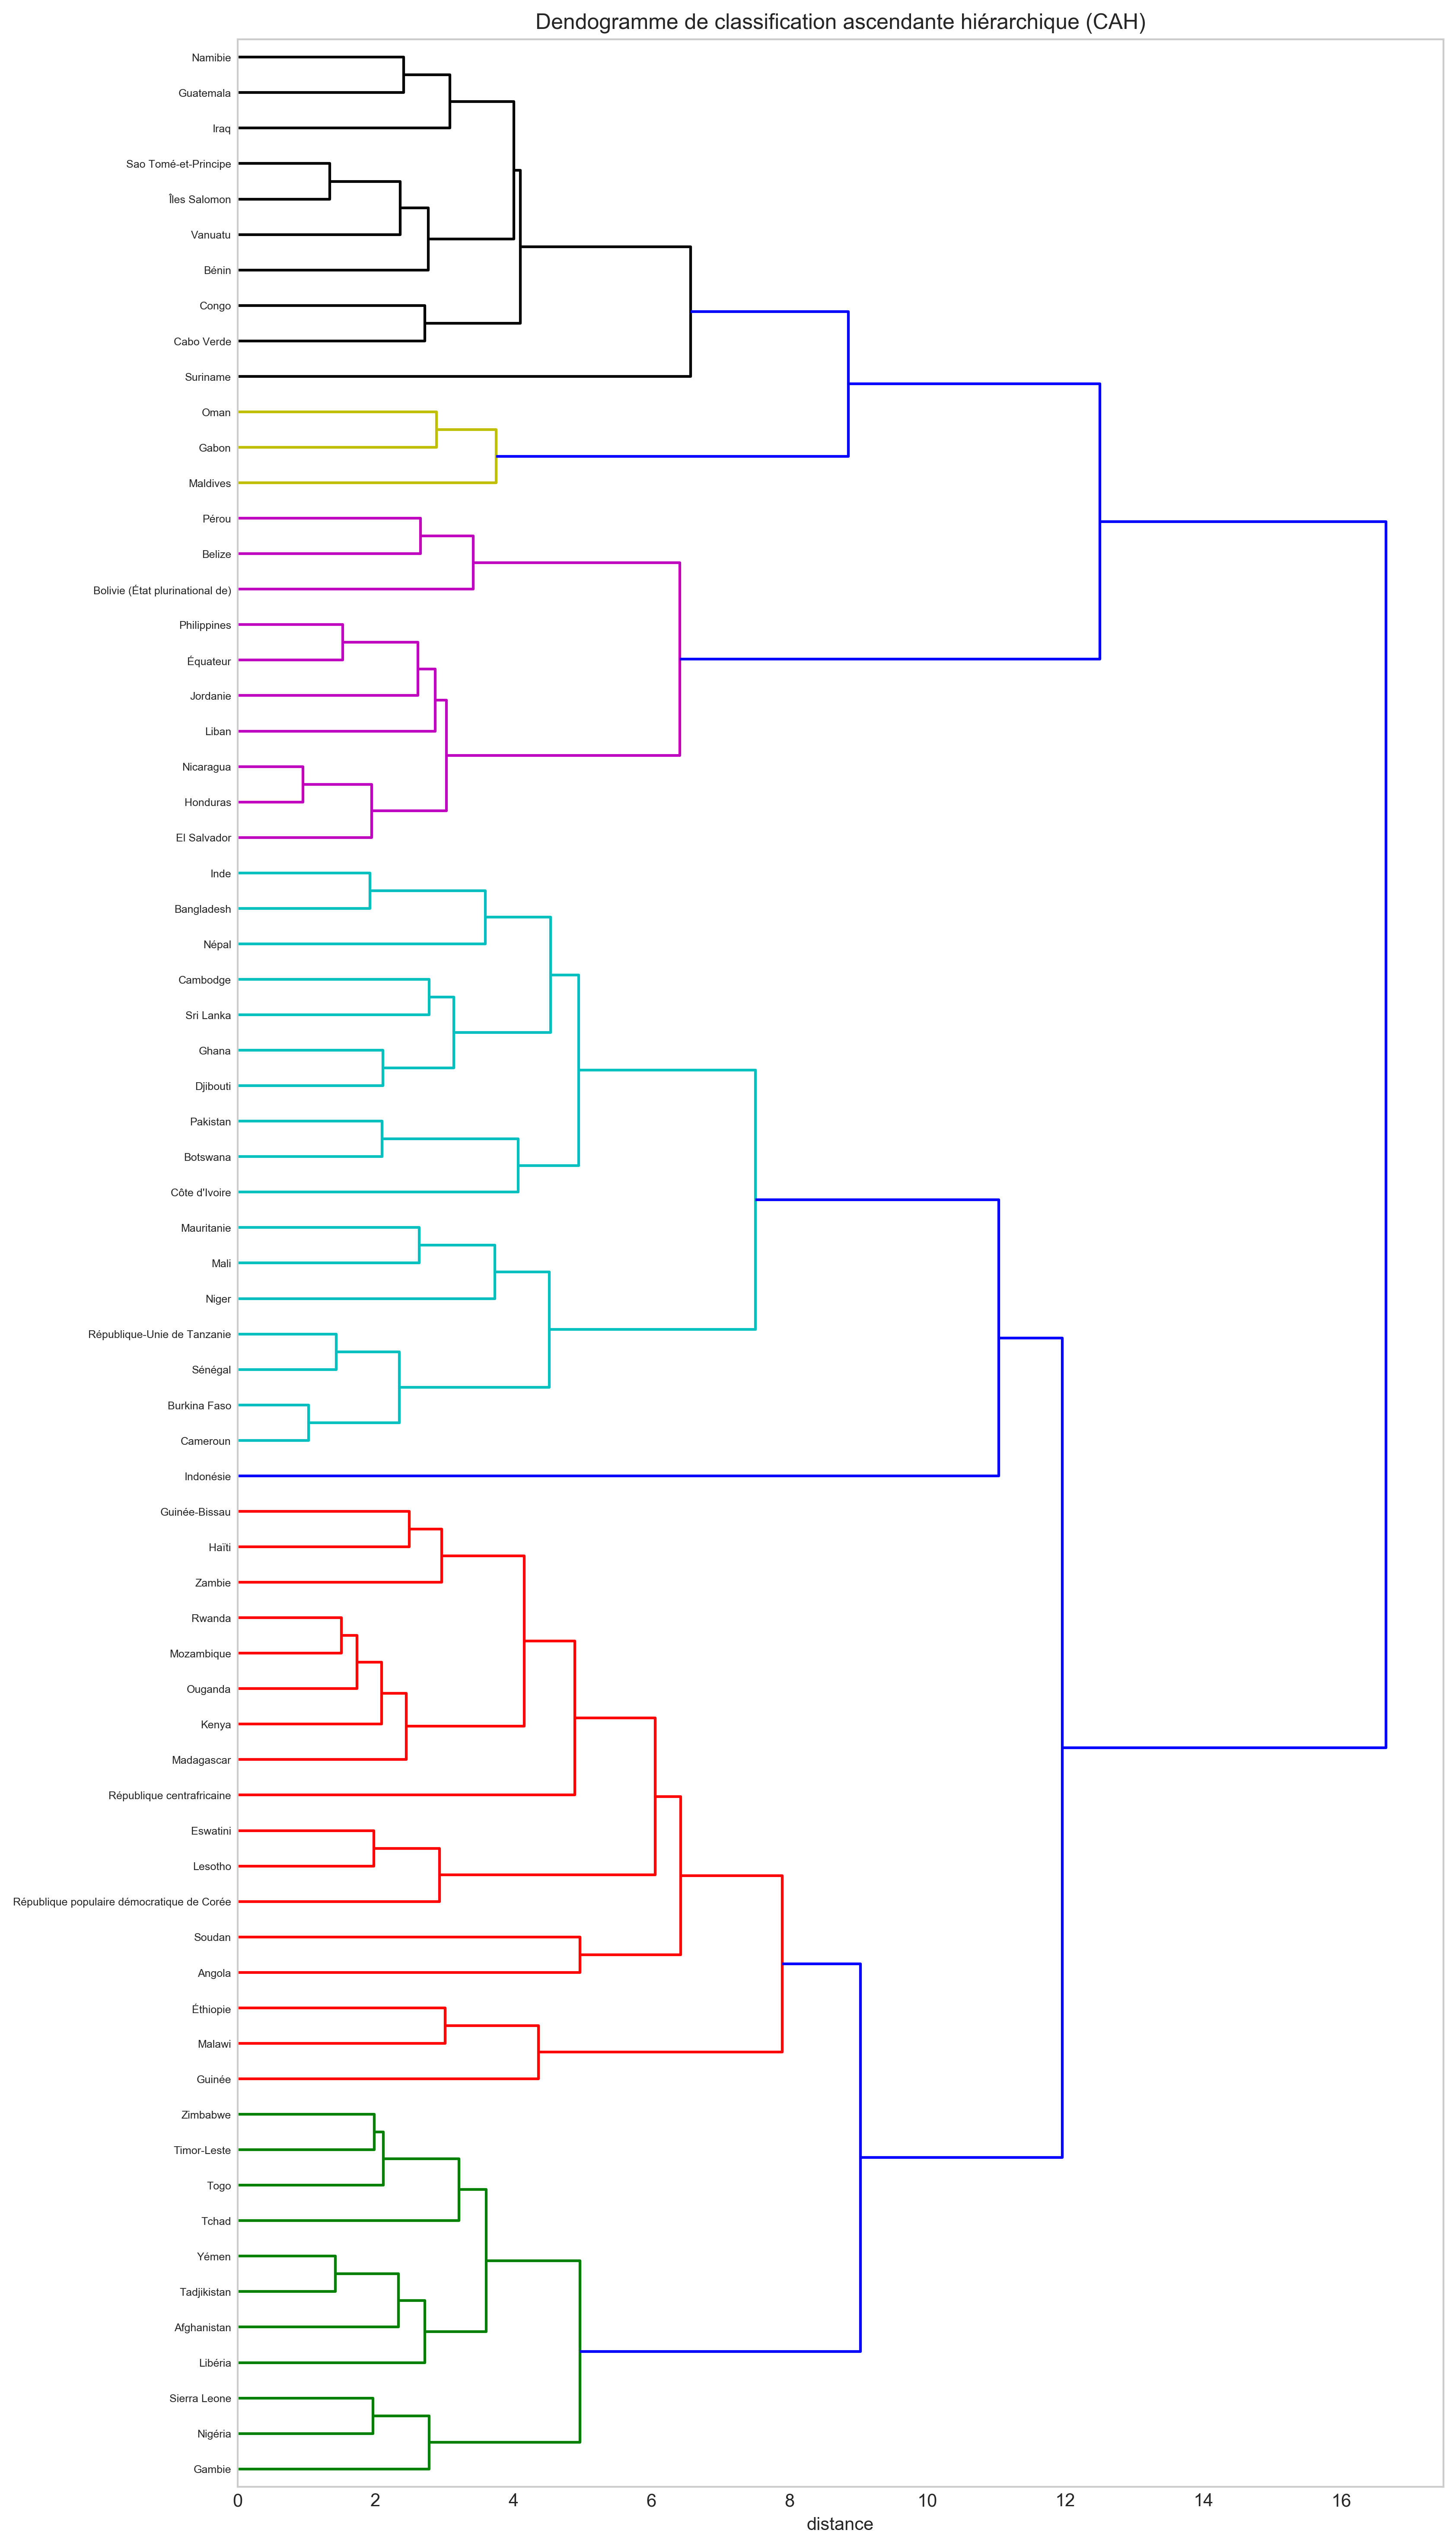

In [7]:
fct.plot_dendogram(Zf=Zf,paysf=paysf,hauteur=8,index=3)

### <span style = "color:blue" id="group2">Attribustion des nouveaux clusters</span>

In [8]:
df_groupage_f10 = fct.clustering(dataset = df_donnees_etendues_clus, Zf = Zf, nb_clust = 6)
df_groupage_f10.sample(10)

,Cluster6,Zone
56,6,Bénin
59,6,Cabo Verde
63,6,Guatemala
18,2,Mozambique
22,2,Lesotho
26,2,Haïti
4,1,Sierra Leone
44,3,Mali
16,2,Rwanda
36,3,Niger


In [9]:
# Affichage du nouveau Cluster dans le DataFrame étendu
df_donnees_etendues = pd.merge(df_donnees_etendues, df_groupage_f10, on="Zone", how="left")
df_donnees_etendues.sample(10)

,Zone,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster,Clusterkm,...,PIB Total US$ (Millions),Nombre de têtes réserves volailles,Moyenne prix conso alim ($/mois),Imports viandes / hbts (kg/personne/an),Imports viande volaille / hbts (kg/personne/an),Import volailles / imports viandes (%),Conso volailles 2017 (kg/hbt/an),Evo conso volailles 2015-2017 (%),Elevage volailles / hbts (kg/personne/an),Cluster6
52,Zimbabwe,181,2017,14236595.0,3.054,793145.0,18691.65,22.691,2,3,...,22040.902301,21617000.0,102.743490,0.561932,0.421449,75.000000,4.68,0.214,4.846665,1
63,Ouganda,226,2017,41166588.0,7.694,782560.0,19107.75,20.783,1,0,...,27208.082675,36419000.0,192.011871,0.024292,5.003144,53.861553,1.52,2.013,1.652287,2
32,Liban,121,2017,6819373.0,4.389,1051200.0,24703.20,29.994,2,3,...,53393.799595,72392000.0,121.373522,6.745488,1.906334,28.260870,10.74,-16.744,18.368698,5
54,Sao Tomé-et-Principe,193,2017,207089.0,3.839,882570.0,18998.25,30.413,2,3,...,365.493009,321000.0,111.883148,9.657683,9.657683,100.000000,9.47,-3.858,3.515397,6
51,Timor-Leste,176,2017,1243258.0,3.925,781100.0,21071.45,27.126,1,3,...,2487.269437,950000.0,98.556827,10.456398,8.847721,84.615385,4.24,-1.852,0.758491,1
14,Équateur,58,2017,16785361.0,3.537,943890.0,24009.70,45.515,2,3,...,104295.862000,161299000.0,129.013693,0.059576,5.003144,53.861553,19.31,-3.546,20.136594,5
48,Pérou,170,2017,31444298.0,3.195,1010685.0,28623.30,37.643,4,3,...,210715.971528,156638000.0,129.406638,2.416972,1.908136,78.947368,13.47,6.147,46.575948,5
40,Mozambique,144,2017,28649018.0,5.943,840960.0,18691.65,17.555,1,0,...,13219.079580,36458000.0,199.093035,1.256588,0.837725,66.666667,3.59,6.213,3.104888,2
21,Guinée,90,2017,12067519.0,5.558,1020175.0,22571.60,18.451,1,0,...,9914.962503,28434000.0,257.082243,3.148949,3.066082,97.368421,4.08,58.140,1.242260,2
23,Honduras,95,2017,9429013.0,3.469,931480.0,23418.40,34.757,2,3,...,23100.781745,46283000.0,129.869185,4.878559,1.272668,26.086957,21.73,1.117,20.425574,5


### <span style = "color:blue" id="moy">Moyennes empiriques des variables par groupes</span>

In [10]:
df_donnees_etendues_means = df_donnees_etendues.pivot_table(index=["Cluster6"], values=["Evolution population (%)","Dispo. Alim. (Kcal/personne)","Dispo. Prot. (g/personne)",
                                            "Prot. Animales/Prot. Totales dispo (%)","Croissance annuelle PIB US$ (%)",
                                            "PIB Total US$ (Millions)","Nombre de têtes réserves volailles","Moyenne prix conso alim ($/mois)",
                                            "Imports viandes / hbts (kg/personne/an)","Imports viande volaille / hbts (kg/personne/an)",
                                            "Import volailles / imports viandes (%)","Conso volailles 2017 (kg/hbt/an)",
                                            "Evo conso volailles 2015-2017 (%)","Elevage volailles / hbts (kg/personne/an)"])
df_donnees_etendues_means

,Conso volailles 2017 (kg/hbt/an),Croissance annuelle PIB US$ (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Elevage volailles / hbts (kg/personne/an),Evo conso volailles 2015-2017 (%),Evolution population (%),Import volailles / imports viandes (%),Imports viande volaille / hbts (kg/personne/an),Imports viandes / hbts (kg/personne/an),Moyenne prix conso alim ($/mois),Nombre de têtes réserves volailles,PIB Total US$ (Millions),Prot. Animales/Prot. Totales dispo (%)
Cluster6,,,,,,,,,,,,,,
1,4.556364,0.836933,8.157418e+05,20399.186364,2.212828,-3.773091,5.013545,84.258878,3.963837,4.102232,153.012320,2.786936e+07,4.323075e+04,22.516000
2,3.792353,14.088386,8.168700e+05,20641.608824,2.020495,7.685118,4.626118,65.530993,3.770309,4.387998,194.518592,2.638329e+07,3.193038e+04,22.293765
3,3.441765,9.872372,9.640509e+05,24947.750000,2.712749,10.402471,4.442294,61.230712,3.029389,1.730495,124.099018,1.263702e+08,2.109040e+05,24.379235
4,7.190000,8.965353,1.055580e+06,25049.950000,8.532895,8.610000,2.426000,0.483092,0.003779,0.782162,161.259870,2.225321e+09,1.015423e+06,32.333000
5,21.090000,5.282911,9.678340e+05,24981.330000,27.822151,0.455000,3.386600,43.297837,2.753473,5.970644,127.331642,9.188210e+07,8.239520e+04,37.512100
6,17.054615,9.407045,9.275773e+05,24104.600000,4.590553,-2.486154,5.221538,81.767221,18.348591,23.338332,135.967441,1.125455e+07,3.126497e+04,38.149231


In [11]:
# Effectifs des Clusters
print(df_donnees_etendues.groupby("Cluster6").size())

Cluster6
1    11
2    17
3    17
4     1
5    10
6    13
dtype: int64


### <span style = "color:blue" id="selectcahetendu">Seconde sélection des pays via CAH sur données sociétales</span>

<div class="alert alert-block alert-info">
    Pour cette seconde sélection, nous allons considérer 2 hypothèses :
    <h3>H1 : Consommation de volailles en hausse et faibles disponibilité :</h3>
    <ul>
        <li><b>Une évolution significative de la consommation de volailles;</b></li>
        <li><b>Une croissance significative du PIB du pays;</b></li>
        <li><b>Des élevages de volailles relativement faibles;</b></li>
        <li><b>Des imports de viandes de volailles encore relativement faibles <em>(marchés à faible concurrence)</em>.</b></li>
    </ul>
    <p>Les moyennes calculées ci-dessus nous indiquent que <b>le groupe 3 correspond à ces indicateurs</b> et le groupe 2 peut également être considéré.</p>
    <h3>H2 : Consommation de volailles élevée et faible production avec imports importants :</h3>
    <ul>
        <li><b>Une forte consommation de volailles;</b></li>
        <li><b>Des élevages de volailles relativement faibles;</b></li>
        <li><b>Des imports de viandes de volailles élevés <em>(marchés à forte concurrence)</em>.</b></li>
    </ul>
    <p>Les moyennes calculées ci-dessus nous indiquent que <b>le groupe 6 correspond à ces indicateurs</b>. Nous allons vérifier avec le Kmeans si nous pouvons affiner l'analyse, tout en marquant ces 2 hypothèses dans le DataFrame.</p>
</div>

In [12]:
#Hypothèses :
df_donnees_etendues["H1"] = np.where(df_donnees_etendues["Cluster6"].isin([2,3]), True, False)
df_donnees_etendues["H2"] = np.where(df_donnees_etendues["Cluster6"].isin([6]), True, False)

In [13]:
#Selection
df_select_pays_cah_etendu = df_donnees_etendues[df_donnees_etendues["Cluster6"].isin([2,3,6])]
df_select_pays_cah_etendu

,Zone,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster,Clusterkm,...,Moyenne prix conso alim ($/mois),Imports viandes / hbts (kg/personne/an),Imports viande volaille / hbts (kg/personne/an),Import volailles / imports viandes (%),Conso volailles 2017 (kg/hbt/an),Evo conso volailles 2015-2017 (%),Elevage volailles / hbts (kg/personne/an),Cluster6,H1,H2
1,Angola,7,2017,2.981677e+07,6.930,828550.0,19750.15,30.456,1,0,...,286.887921,14.086035,9.290075,65.952381,10.56,-19.939,0.901204,2,True,False
2,Bangladesh,16,2017,1.596854e+08,2.195,947540.0,22002.20,19.841,2,3,...,155.872191,0.006262,5.003144,53.861553,1.50,3.448,1.217569,3,True,False
4,Botswana,20,2017,2.205080e+06,3.978,854100.0,23790.70,40.580,2,3,...,134.865894,4.081485,1.360495,33.333333,3.39,11.513,2.086092,3,True,False
6,Îles Salomon,25,2017,6.360390e+05,5.458,880015.0,19585.90,29.556,2,0,...,112.343513,11.005614,9.433384,85.714286,4.45,-7.484,0.462236,6,False,True
7,Cameroun,32,2017,2.456607e+07,5.441,968345.0,25349.25,16.213,1,0,...,110.963869,0.040707,5.003144,53.861553,3.16,-2.469,3.112870,3,True,False
8,Cabo Verde,35,2017,5.374980e+05,2.431,917975.0,25309.10,37.064,2,3,...,109.424145,31.628025,22.325664,70.588235,17.62,1.323,1.838146,6,False,True
9,République centrafricaine,37,2017,4.596023e+06,2.289,641670.0,16950.60,43.712,2,3,...,149.301274,1.087897,0.870318,80.000000,2.29,27.933,1.445815,2,True,False
10,Sri Lanka,38,2017,2.112803e+07,1.052,953745.0,23498.70,29.093,2,3,...,127.041667,0.094661,5.003144,53.861553,7.78,14.580,9.087453,3,True,False
12,Congo,46,2017,5.110695e+06,5.243,842785.0,20403.50,47.710,2,0,...,117.737638,27.784871,20.349483,73.239437,21.53,-11.654,1.360872,6,False,True
13,Bénin,53,2017,1.117520e+07,5.666,1005940.0,23520.60,22.331,1,0,...,119.365759,11.274968,11.006516,97.619048,14.40,-20.923,1.262528,6,False,True


In [14]:
print("La sélection via CAH compte donc",df_select_pays_cah_etendu.shape[0],"Pays.")

La sélection via CAH compte donc 47 Pays.


## <span style="color:orange" id="kmeans2">Comparaison sur les données étendues avec le Kmeans</span>

### <span style = "color:blue" id="cme">Détection du meilleur K sur données étendues</span>

In [17]:
#faire varier le nombre de clusters de 2 à 15 avec la méthode des silhouettes
res_e = np.arange ( 14, dtype ="double" )
for k_e in np.arange(14):
    kms_e = KMeans(n_clusters = k_e+2)
    kms_e.fit(X_crf)
    res_e[k_e] = metrics.silhouette_score(X_crf, kms_e.labels_)
print(res_e)

[0.24060892 0.25853626 0.180894   0.18799491 0.16163159 0.16554053
 0.17699206 0.17740311 0.15427241 0.15241545 0.16539798 0.13845906
 0.14497971 0.16551116]


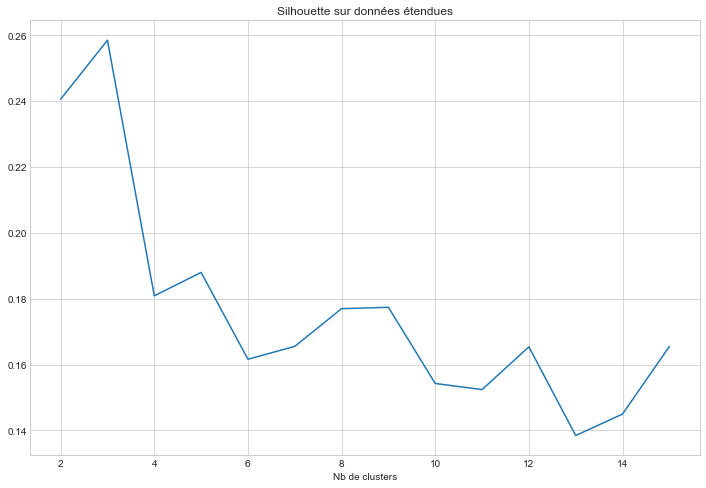

In [18]:
plt.figure(figsize=(12,8))
plt.title("Silhouette sur données étendues")
plt.xlabel("Nb de clusters")
plt.plot(np.arange(2,16,1), res_e)
plt.show()

Ici encore, avec les données étendues, on remarque que le nombre de K idéal serait K=2. Un Clustering ici sur 2 groupes ne serait pas assez précis. **Nous allons donc réaliser un clustering en 5 groupes pour obtenir des résultats cohérents**.

### <span style = "color:blue" id="kmeans3">Kmeans sur les données étendues centrées réduites</span>

In [19]:
kmf, clusters_kmf, pcaf, X_projectedf = fct.kmeans(n_clust = 5, X_crf = X_crf)

### <span style = "color:blue" id="eboulisetendu">ACP - Eboulis des valeurs propres sur données étendues</span>

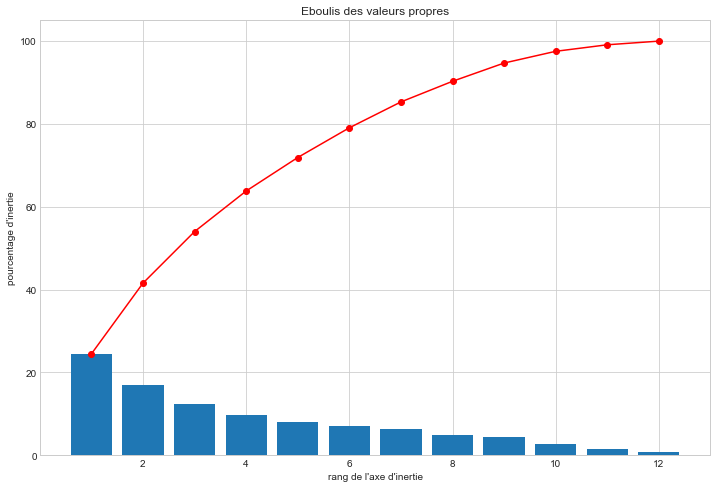

[24.48554229 17.08148166 12.44863691  9.79606946  8.08828967  7.1753327
  6.24641051  4.97991347  4.40904754  2.83250252  1.57482137  0.88195189]


In [20]:
fct.eboulis(pcaf)

**Le premier plan factoriel couvrira une inertie d'un peu plus de 42 % seulement**. Il faudra donc certainement prendre en compte le second plan factoriel également.

### <span style = "color:blue" id="ccorretendu">ACP - Cercle des corrélations sur données étendues</span>

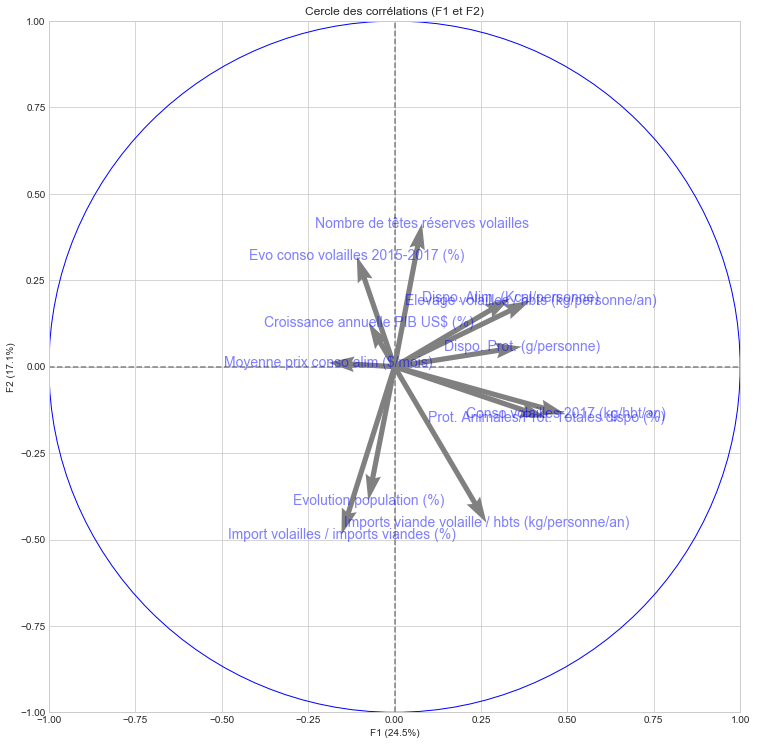

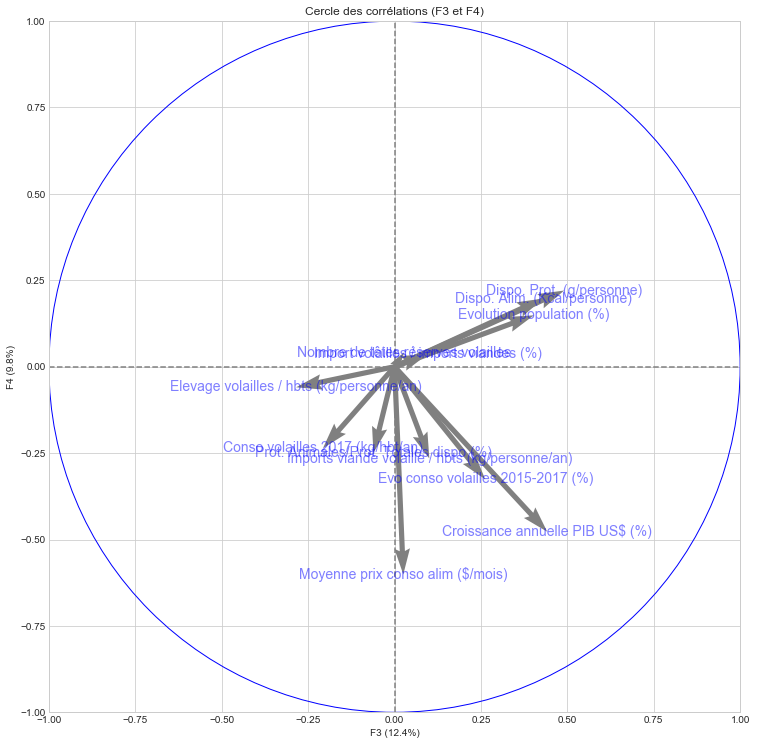

In [23]:
pcsf = pcaf.components_
cerle_corr(pcsf, 4, pcaf, [(0,1),(2,3)], labels = np.array(df_donnees_etendues_clus.columns))

In [24]:
df_var_syn_e = pd.DataFrame(X_projectedf, index=df_donnees_etendues_clus.index, columns=["F"+str(i+1) for i in range(12)])
df_var_syn_e.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12
Zone,,,,,,,,,,,,
Afghanistan,-2.051085,-1.095665,-1.198073,0.872504,0.705705,-0.012533,1.095168,-0.054720,-0.313326,-0.225586,-0.075773,-0.072024
Angola,-1.122326,-1.387980,0.357222,-2.452893,2.253041,-0.949787,1.506615,-0.443639,-0.356613,0.125819,0.791658,-0.171592
Bangladesh,-0.771304,1.447310,0.056104,0.044144,0.447267,0.623759,-0.437213,-1.101779,-0.192083,-0.098212,0.119276,0.307767
Bolivie (État plurinational de),3.737959,1.210391,-2.077293,-1.474533,-0.695877,-1.185750,1.487321,0.917677,-1.107032,0.063436,-0.525580,-0.646516
Botswana,-0.025701,0.932234,0.072636,-0.271913,-0.342984,0.710005,0.739870,0.484185,1.507142,-0.605614,0.553347,-0.006904


In [25]:
f1 = pcaf.components_[0]
print(f1)

[-0.07608931  0.33531518  0.36767084  0.43827657 -0.07519504  0.07939145
 -0.1915841   0.26609446 -0.15358518  0.49507328 -0.10931197  0.39294129]


Grâce à la répartition des composants de F1, on peut déterminer les colonnes qui ont le plus d'impact :

In [26]:
df_donnees_etendues_clus.columns[[9,3,11,2,1,7]]

Index(['Conso volailles 2017 (kg/hbt/an)',
       'Prot. Animales/Prot. Totales dispo (%)',
       'Elevage volailles / hbts (kg/personne/an)',
       'Dispo. Prot. (g/personne)', 'Dispo. Alim. (Kcal/personne)',
       'Imports viande volaille / hbts (kg/personne/an)'],
      dtype='object')

**$F_1$ projete donc les besoins alors que $F_2$ va plûtot décrire les disponibilités.**

### <span style = "color:blue" id="factoe">Projection sur les plans factoriels</span>

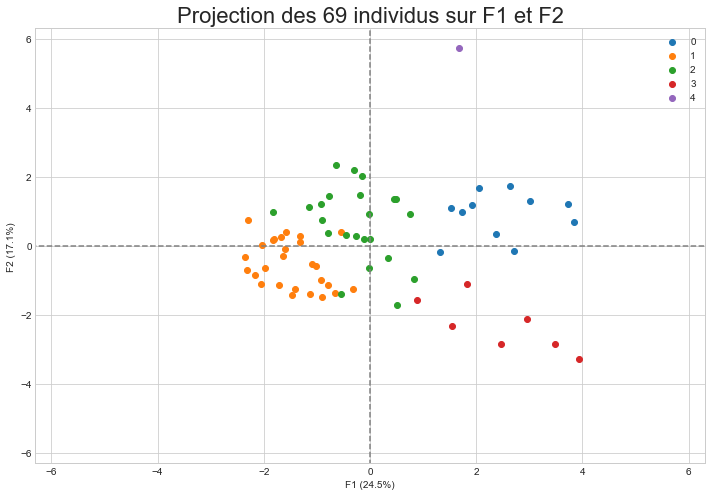

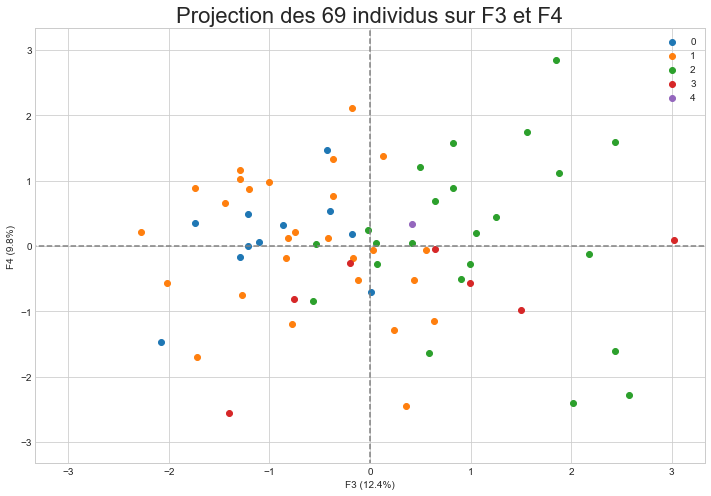

In [28]:
plot_plans_factoriels(X_projectedf, 4, pcaf, [(0,1),(2,3)], illustrative_var = clusters_kmf)

In [29]:
#distances aux centres de classes des observations
df_inertie = pd.DataFrame(kmf.transform(X_crf), index=df_donnees_etendues_clus.index, columns=["I0","I1","I2","I3","I4"])
df_inertie

,I0,I1,I2,I3,I4
Zone,,,,,
Afghanistan,5.233321,1.775817,3.805984,5.572002,9.670048
Angola,5.955421,4.056607,4.797966,5.323569,9.833446
Bangladesh,4.102750,2.690501,1.967942,5.180557,7.353450
Bolivie (État plurinational de),3.047782,6.410357,6.007035,5.856461,9.083160
Botswana,3.588152,3.065755,2.344990,4.656487,8.318769
...,...,...,...,...,...
Burkina Faso,4.299340,3.463904,2.311926,4.863714,8.644996
Éthiopie,5.580189,3.179082,3.689660,6.404715,9.003855
Yémen,4.803555,1.997740,3.951024,5.231671,9.676306


In [32]:
# Export des centroides et des coordonnées dans chacune des dimensions
centroidesf = kmf.cluster_centers_
centroidesf

array([[-0.60781853,  0.64978751,  0.57393366,  0.8307567 , -0.44893001,
        -0.01027019, -0.37963077, -0.39751757, -0.8539524 ,  1.42342522,
        -0.20895699,  1.89268988],
       [ 0.17950345, -0.93348254, -0.84298619, -0.54539415, -0.29811516,
        -0.22422803,  0.34074867, -0.24554489,  0.37415511, -0.5494777 ,
        -0.26379937, -0.44856663],
       [-0.05439756,  0.60330402,  0.44414536, -0.29840281,  0.60190724,
         0.03340453, -0.17593274, -0.26100792, -0.06830977, -0.45536801,
         0.55824714, -0.3395482 ],
       [ 0.6095725 ,  0.37475766,  0.80744859,  1.72215988, -0.12796831,
        -0.29739808, -0.17665119,  2.54726925,  0.51566627,  1.40711449,
        -0.53880384, -0.15538767],
       [-1.17645295,  1.55706987,  0.57987356,  0.39546376,  0.03925095,
         7.48061134,  0.25873556, -0.82529713, -2.74725077, -0.19811664,
         0.35305246,  0.18903249]])

In [36]:
df_centroidesf = pd.DataFrame(centroidesf, columns=df_donnees_etendues_clus.columns)
df_centroidesf

,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Croissance annuelle PIB US$ (%),Nombre de têtes réserves volailles,Moyenne prix conso alim ($/mois),Imports viande volaille / hbts (kg/personne/an),Import volailles / imports viandes (%),Conso volailles 2017 (kg/hbt/an),Evo conso volailles 2015-2017 (%),Elevage volailles / hbts (kg/personne/an)
0,-0.607819,0.649788,0.573934,0.830757,-0.448930,-0.010270,-0.379631,-0.397518,-0.853952,1.423425,-0.208957,1.892690
1,0.179503,-0.933483,-0.842986,-0.545394,-0.298115,-0.224228,0.340749,-0.245545,0.374155,-0.549478,-0.263799,-0.448567
2,-0.054398,0.603304,0.444145,-0.298403,0.601907,0.033405,-0.175933,-0.261008,-0.068310,-0.455368,0.558247,-0.339548
3,0.609572,0.374758,0.807449,1.722160,-0.127968,-0.297398,-0.176651,2.547269,0.515666,1.407114,-0.538804,-0.155388
4,-1.176453,1.557070,0.579874,0.395464,0.039251,7.480611,0.258736,-0.825297,-2.747251,-0.198117,0.353052,0.189032


In [37]:
df_centroidesf.to_csv("exports/P5_centroides_kmeans_etendu.csv",index=True)

## <span style="color:orange" id="interpe">Interprétation des Clusters sur données étendues</span>

### <span style = "color:blue" id="moykme">Moyennes conditionnelles et effectifs.</span>

In [38]:
#correspondance avec les groupes de la CAH
df_donnees_etendues['Clusterkm5'] = clusters_kmf

In [39]:
df_var_syn_e = df_var_syn_e[["F1","F2","F3","F4"]]
df_donnees_etendues = pd.merge(df_donnees_etendues, df_var_syn_e, on='Zone', how='left')
df_donnees_etendues.to_csv("datas/pays_clustering_etendu.csv", index=False)

pd.crosstab(df_donnees_etendues['Cluster6'],df_donnees_etendues['Clusterkm5'])

Clusterkm5,0,1,2,3,4
Cluster6,,,,,
1,0,11,0,0,0
2,0,13,4,0,0
3,0,1,16,0,0
4,0,0,0,0,1
5,10,0,0,0,0
6,1,2,3,7,0


In [40]:
# effectifs conditionnel sur Kmeans
gbe = df_donnees_etendues.groupby('Clusterkm5')
nke = gbe.size()
print(nke)

Clusterkm5
0    11
1    27
2    23
3     7
4     1
dtype: int64


In [41]:
# Moyennes conditionnelles
mke = gbe.mean()
mke = mke[['Evolution population (%)','Dispo. Alim. (Kcal/personne)','Dispo. Prot. (g/personne)','Prot. Animales/Prot. Totales dispo (%)',
           'Croissance annuelle PIB US$ (%)', 'PIB Total US$ (Millions)','Nombre de têtes réserves volailles',
           'Moyenne prix conso alim ($/mois)','Imports viandes / hbts (kg/personne/an)',
           'Imports viande volaille / hbts (kg/personne/an)','Import volailles / imports viandes (%)',
           'Conso volailles 2017 (kg/hbt/an)', 'Evo conso volailles 2015-2017 (%)','Elevage volailles / hbts (kg/personne/an)',
           'F1','F2','F3','F4']]
mke

,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Croissance annuelle PIB US$ (%),PIB Total US$ (Millions),Nombre de têtes réserves volailles,Moyenne prix conso alim ($/mois),Imports viandes / hbts (kg/personne/an),Imports viande volaille / hbts (kg/personne/an),Import volailles / imports viandes (%),Conso volailles 2017 (kg/hbt/an),Evo conso volailles 2015-2017 (%),Elevage volailles / hbts (kg/personne/an),F1,F2,F3,F4
Clusterkm5,,,,,,,,,,,,,,,,,,
0,3.449364,9.644295e+05,25029.045455,36.902818,5.723658,8.177925e+04,8.683364e+07,131.754977,6.395264,3.196465,45.876822,21.043636,0.598455,26.496779,2.441560,0.902157,-0.953884,0.093296
1,4.866296,8.053657e+05,20042.420370,22.455630,6.725122,3.444121e+04,2.575322e+07,165.050465,4.559054,4.330696,75.321933,4.188148,-0.183333,1.809856,-1.478570,-0.514669,-0.654536,0.042319
2,4.445348,9.597596e+05,24572.276087,25.048609,12.701590,1.690806e+05,9.930184e+07,141.169773,3.893925,4.215289,64.713393,4.992174,11.535087,2.959379,-0.248798,0.625770,1.040316,0.115451
3,5.640286,9.367986e+05,25850.864286,46.261000,7.854958,1.654015e+04,4.864732e+06,141.136566,32.748725,25.174559,78.714805,20.904286,-4.103571,4.901224,2.443873,-2.307487,0.545649,-0.737267
4,2.426000,1.055580e+06,25049.950000,32.333000,8.965353,1.015423e+06,2.225321e+09,161.259870,0.782162,0.003779,0.483092,7.190000,8.610000,8.532895,1.679459,5.732043,0.418385,0.336614


### <span style = "color:blue" id="selectkme">Sélection des pays avec les Kmeans des données étendues.</span>

<div class="alert alert-block alert-info">
    En se basant sur les mêmes critères que lors de la sélection des pays par CAH, <b>les clusters Kmeans à sélectionner sont ceux dont le F1 est inférieur à 1 et le F2 > 0 pour l'hypothèse H1</b> et ceux dont le <b>F1 est supérieur à 2 et F2 < 2 pour l'hypothèse H2</b>, soit : 
</div>

In [42]:
liste_km_fin = mke.loc[(((mke['F1'] < 1) & (mke['F2'] > 0)) | ((mke['F1'] > 2) & (mke['F2'] < -2)))].index.to_list()
print("Les clusters sélectionnés sont :",liste_km_fin)

Les clusters sélectionnés sont : [2, 3]


In [43]:
df_select_pays_kmeans_etendu = df_donnees_etendues[df_donnees_etendues['Clusterkm5'].isin(liste_km_fin)]
df_select_pays_kmeans_etendu

,Zone,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster,Clusterkm,...,Evo conso volailles 2015-2017 (%),Elevage volailles / hbts (kg/personne/an),Cluster6,H1,H2,Clusterkm5,F1,F2,F3,F4
2,Bangladesh,16,2017,1.596854e+08,2.195,947540.0,22002.20,19.841,2,3,...,3.448,1.217569,3,True,False,2,-0.771304,1.447310,0.056104,0.044144
4,Botswana,20,2017,2.205080e+06,3.978,854100.0,23790.70,40.580,2,3,...,11.513,2.086092,3,True,False,2,-0.025701,0.932234,0.072636,-0.271913
7,Cameroun,32,2017,2.456607e+07,5.441,968345.0,25349.25,16.213,1,0,...,-2.469,3.112870,3,True,False,2,-0.271819,0.274328,0.825534,1.576384
8,Cabo Verde,35,2017,5.374980e+05,2.431,917975.0,25309.10,37.064,2,3,...,1.323,1.838146,6,False,True,3,1.827209,-1.118012,-0.197301,-0.266602
10,Sri Lanka,38,2017,2.112803e+07,1.052,953745.0,23498.70,29.093,2,3,...,14.580,9.087453,3,True,False,2,0.498936,1.347132,-0.534965,0.029894
12,Congo,46,2017,5.110695e+06,5.243,842785.0,20403.50,47.710,2,0,...,-11.654,1.360872,6,False,True,3,1.539562,-2.331892,-0.751417,-0.816923
13,Bénin,53,2017,1.117520e+07,5.666,1005940.0,23520.60,22.331,1,0,...,-20.923,1.262528,6,False,True,2,0.513792,-1.720898,0.494756,1.212313
16,Djibouti,72,2017,9.440990e+05,3.294,978200.0,24341.85,19.238,2,3,...,24.651,1.789887,3,True,False,2,-0.781749,0.370422,0.827309,0.881065
17,Gabon,74,2017,2.064823e+06,6.014,964695.0,29083.20,48.670,2,0,...,-9.754,1.888782,6,False,True,3,3.943950,-3.284881,0.991030,-0.573881
19,Ghana,81,2017,2.912146e+07,4.568,1107045.0,22980.40,24.381,2,0,...,14.376,1.999350,3,True,False,2,-0.003519,0.192180,1.256352,0.437609


## <span style="color:orange" id="comparee">Comparaisons des pays issus des 2 méthodes</span>

In [44]:
df_compare = pd.merge(df_select_pays_cah_etendu[['Zone','Cluster6']], df_select_pays_kmeans_etendu[['Zone','Clusterkm5']],
                     on='Zone', how='outer')
df_compare

,Zone,Cluster6,Clusterkm5
0,Angola,2,NaN
1,Bangladesh,3,2.0
2,Botswana,3,2.0
3,Îles Salomon,6,NaN
4,Cameroun,3,2.0
5,Cabo Verde,6,3.0
6,République centrafricaine,2,NaN
7,Sri Lanka,3,2.0
8,Congo,6,3.0
9,Bénin,6,2.0


**Vérifions les Clusters Kmeans des Pays qui ne sont pas ressortis :**

In [45]:
liste_verif = df_compare.loc[((df_compare['Clusterkm5'].isnull() == True) | (df_compare['Cluster6'].isnull() == True)),'Zone'].to_list()

In [46]:
df_ajout_final = df_donnees_etendues.loc[(df_donnees_etendues['Zone'].isin(liste_verif)),['Zone','Cluster6','Clusterkm5','Evo conso volailles 2015-2017 (%)',
                                                                        'Croissance annuelle PIB US$ (%)','Elevage volailles / hbts (kg/personne/an)',
                                                                        'Imports viande volaille / hbts (kg/personne/an)','Import volailles / imports viandes (%)',
                                                                        'Evolution population (%)','H1','H2','F1','F2','F3','F4']]
df_ajout_final

,Zone,Cluster6,Clusterkm5,Evo conso volailles 2015-2017 (%),Croissance annuelle PIB US$ (%),Elevage volailles / hbts (kg/personne/an),Imports viande volaille / hbts (kg/personne/an),Import volailles / imports viandes (%),Evolution population (%),H1,H2,F1,F2,F3,F4
1,Angola,2,1,-19.939,20.766647,0.901204,9.290075,65.952381,6.930,True,False,-1.122326,-1.387980,0.357222,-2.452893
6,Îles Salomon,6,1,-7.484,6.223974,0.462236,9.433384,85.714286,5.458,False,True,-0.652356,-1.373772,-0.366482,0.759595
9,République centrafricaine,2,1,27.933,10.279298,1.445815,0.870318,80.000000,2.289,True,False,-1.824124,0.173473,-1.715016,-1.701252
20,Guatemala,6,0,2.033,10.131134,13.243062,7.626381,71.666667,4.077,False,True,1.310544,-0.175364,0.014197,-0.710317
22,Haïti,2,1,15.265,12.152855,0.760219,8.103900,90.816327,2.682,True,False,-1.644043,-0.286058,-0.778655,-1.197815
29,Kenya,2,1,9.836,13.829703,0.604885,5.003144,53.861553,4.893,True,False,-1.679632,0.250660,0.237595,-1.282460
31,République populaire démocratique de Corée,2,1,-7.429,3.446525,1.223839,5.003144,53.861553,0.977,True,False,-1.575681,0.404333,-2.278790,0.213070
33,Lesotho,2,1,-13.991,11.894117,0.917987,7.171770,48.387097,1.579,True,False,-0.543635,0.400493,-0.834843,-0.191702
35,Madagascar,2,1,3.237,11.205528,1.821982,5.003144,53.861553,5.515,True,False,-2.346904,-0.320016,-1.269639,-0.745612
40,Mozambique,2,1,6.213,10.740445,3.104888,0.837725,66.666667,5.943,True,False,-2.039142,0.034339,-0.118799,-0.522843


Ces différents pays présentent pour certains les caractéristiques suivantes :
- **Consommation de volailles stable ou en évolution**,
- **PIB avec une évolution**,
- **Elevages de volailles faibles**,
- **Importations de volailles encore faible pour une évolution importante de la population**.

Mais l'ensemble des critères ne sont pas représentés.

In [47]:
# Ajout des pays H1 et H2 avec évolution conso volailles > 0 et elevages de volailles < 5
df_ajout_final = df_ajout_final[(df_ajout_final['Evo conso volailles 2015-2017 (%)'] > 0) & (df_ajout_final['Elevage volailles / hbts (kg/personne/an)'] < 5)]
df_ajout_final

,Zone,Cluster6,Clusterkm5,Evo conso volailles 2015-2017 (%),Croissance annuelle PIB US$ (%),Elevage volailles / hbts (kg/personne/an),Imports viande volaille / hbts (kg/personne/an),Import volailles / imports viandes (%),Evolution population (%),H1,H2,F1,F2,F3,F4
9,République centrafricaine,2,1,27.933,10.279298,1.445815,0.870318,80.000000,2.289,True,False,-1.824124,0.173473,-1.715016,-1.701252
22,Haïti,2,1,15.265,12.152855,0.760219,8.103900,90.816327,2.682,True,False,-1.644043,-0.286058,-0.778655,-1.197815
29,Kenya,2,1,9.836,13.829703,0.604885,5.003144,53.861553,4.893,True,False,-1.679632,0.250660,0.237595,-1.282460
35,Madagascar,2,1,3.237,11.205528,1.821982,5.003144,53.861553,5.515,True,False,-2.346904,-0.320016,-1.269639,-0.745612
40,Mozambique,2,1,6.213,10.740445,3.104888,0.837725,66.666667,5.943,True,False,-2.039142,0.034339,-0.118799,-0.522843
53,Rwanda,2,1,11.194,7.800621,1.324602,5.003144,53.861553,5.382,True,False,-1.801112,0.191399,0.024897,-0.064011
63,Ouganda,2,1,2.013,7.019466,1.652287,5.003144,53.861553,7.694,True,False,-1.969719,-0.648979,-0.171414,-0.190134
65,Éthiopie,2,1,8.333,6.412530,0.668506,0.009399,50.000000,5.518,True,False,-2.288693,0.748625,0.433651,-0.528869
67,Zambie,2,1,5.231,20.582405,2.887870,0.712014,100.000000,6.135,True,False,-2.325547,-0.698879,0.633960,-1.144392


## <span style="color:orange" id="selectfin">Sélection finale des pays pour export</span>

In [48]:
df_select_pays_kmeans_etendu = pd.concat([df_select_pays_kmeans_etendu,(df_donnees_etendues[df_donnees_etendues["Zone"].isin(df_ajout_final["Zone"].unique())])])
df_select_pays_kmeans_etendu

,Zone,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster,Clusterkm,...,Evo conso volailles 2015-2017 (%),Elevage volailles / hbts (kg/personne/an),Cluster6,H1,H2,Clusterkm5,F1,F2,F3,F4
2,Bangladesh,16,2017,1.596854e+08,2.195,947540.0,22002.20,19.841,2,3,...,3.448,1.217569,3,True,False,2,-0.771304,1.447310,0.056104,0.044144
4,Botswana,20,2017,2.205080e+06,3.978,854100.0,23790.70,40.580,2,3,...,11.513,2.086092,3,True,False,2,-0.025701,0.932234,0.072636,-0.271913
7,Cameroun,32,2017,2.456607e+07,5.441,968345.0,25349.25,16.213,1,0,...,-2.469,3.112870,3,True,False,2,-0.271819,0.274328,0.825534,1.576384
8,Cabo Verde,35,2017,5.374980e+05,2.431,917975.0,25309.10,37.064,2,3,...,1.323,1.838146,6,False,True,3,1.827209,-1.118012,-0.197301,-0.266602
10,Sri Lanka,38,2017,2.112803e+07,1.052,953745.0,23498.70,29.093,2,3,...,14.580,9.087453,3,True,False,2,0.498936,1.347132,-0.534965,0.029894
12,Congo,46,2017,5.110695e+06,5.243,842785.0,20403.50,47.710,2,0,...,-11.654,1.360872,6,False,True,3,1.539562,-2.331892,-0.751417,-0.816923
13,Bénin,53,2017,1.117520e+07,5.666,1005940.0,23520.60,22.331,1,0,...,-20.923,1.262528,6,False,True,2,0.513792,-1.720898,0.494756,1.212313
16,Djibouti,72,2017,9.440990e+05,3.294,978200.0,24341.85,19.238,2,3,...,24.651,1.789887,3,True,False,2,-0.781749,0.370422,0.827309,0.881065
17,Gabon,74,2017,2.064823e+06,6.014,964695.0,29083.20,48.670,2,0,...,-9.754,1.888782,6,False,True,3,3.943950,-3.284881,0.991030,-0.573881
19,Ghana,81,2017,2.912146e+07,4.568,1107045.0,22980.40,24.381,2,0,...,14.376,1.999350,3,True,False,2,-0.003519,0.192180,1.256352,0.437609


Nous avons pu, grâce à la CAH et au Kmeans, sélectionner une liste de pays ayant les caractéristiques idéales pour débuter nos exportations de poulets.
**Nous allons à présent sélectionner, en fonction des 2 hypothèses, les meilleurs prétendants** :

In [49]:
# Tri par distance des centres de classes
df_hypothese_1 = df_select_pays_kmeans_etendu[df_select_pays_kmeans_etendu["H1"] == True]
df_hypothese_1 = pd.merge(df_hypothese_1, df_inertie, how="left", on="Zone")
df_hypothese_1_inert = df_hypothese_1.sort_values(['I2', 'I1'], ascending=[True, True])
df_hypothese_1_inert[["Zone","I1","I2","Evo conso volailles 2015-2017 (%)","Imports viande volaille / hbts (kg/personne/an)",
               "Elevage volailles / hbts (kg/personne/an)"]].head(10)

,Zone,I1,I2,Evo conso volailles 2015-2017 (%),Imports viande volaille / hbts (kg/personne/an),Elevage volailles / hbts (kg/personne/an)
16,Sénégal,2.269320,1.381780,6.966,5.003144,4.188437
2,Cameroun,2.758481,1.851524,-2.469,5.003144,3.112870
0,Bangladesh,2.690501,1.967942,3.448,5.003144,1.217569
5,Ghana,3.376406,2.075503,14.376,5.185179,1.999350
18,Burkina Faso,3.463904,2.311926,-7.724,5.003144,2.504685
4,Djibouti,3.268859,2.330781,24.651,3.177633,1.789887
3,Sri Lanka,3.353972,2.336475,14.580,5.003144,9.087453
1,Botswana,3.065755,2.344990,11.513,1.360495,2.086092
25,Rwanda,1.561381,2.401441,11.194,5.003144,1.324602
9,Cambodge,3.582468,2.469346,40.964,0.624633,1.096230


On remarque que le tri par distance des centroïdes ne donne pas de résultats intéressant pour l'hypothèse 1. **Nous allons donc prendre les pays avec la plus forte évolution de consommation de volailles** :

In [50]:
df_hypothese_1_fin = df_hypothese_1[["Zone","I1","I2","Evo conso volailles 2015-2017 (%)","Imports viande volaille / hbts (kg/personne/an)",
                "Elevage volailles / hbts (kg/personne/an)"]].sort_values("Evo conso volailles 2015-2017 (%)",  ascending=False).head(10)
df_hypothese_1_fin

,Zone,I1,I2,Evo conso volailles 2015-2017 (%),Imports viande volaille / hbts (kg/personne/an),Elevage volailles / hbts (kg/personne/an)
6,Guinée,5.348533,4.534779,58.140,3.066082,1.242260
8,Côte d'Ivoire,4.583256,3.395752,42.938,0.286445,1.830140
9,Cambodge,3.582468,2.469346,40.964,0.624633,1.096230
20,République centrafricaine,3.765320,4.650753,27.933,0.870318,1.445815
10,Malawi,4.501758,3.729430,25.485,5.003144,7.363472
4,Djibouti,3.268859,2.330781,24.651,3.177633,1.789887
13,Népal,4.687318,2.552747,23.602,5.003144,2.072474
21,Haïti,2.157325,3.073992,15.265,8.103900,0.760219
3,Sri Lanka,3.353972,2.336475,14.580,5.003144,9.087453
5,Ghana,3.376406,2.075503,14.376,5.185179,1.999350


Vérifions maintenant la seconde hypothèse :

In [51]:
df_hypothese_2 = df_select_pays_kmeans_etendu[df_select_pays_kmeans_etendu["H2"] == True]
df_hypothese_2 = pd.merge(df_hypothese_2, df_inertie, how="left", on="Zone")
df_hypothese_2_inert = df_hypothese_2.sort_values(['I3', 'I2'], ascending=[True, True])
df_hypothese_2_inert[["Zone","I3","I2","Conso volailles 2017 (kg/hbt/an)","Imports viande volaille / hbts (kg/personne/an)",
               "Elevage volailles / hbts (kg/personne/an)"]].head(10)

,Zone,I3,I2,Conso volailles 2017 (kg/hbt/an),Imports viande volaille / hbts (kg/personne/an),Elevage volailles / hbts (kg/personne/an)
1,Congo,2.130326,4.405833,21.53,20.349483,1.360872
3,Gabon,2.247418,6.194922,29.33,36.807029,1.888782
0,Cabo Verde,2.271898,3.594710,17.62,22.325664,1.838146
7,Vanuatu,2.403374,2.781507,11.66,14.010017,3.978845
9,Oman,3.060482,5.708229,21.63,27.004274,1.392006
5,Maldives,3.069099,5.625821,13.50,24.173956,7.848053
6,Namibie,3.392716,2.387304,11.53,12.070091,4.329001
2,Bénin,3.556679,3.279044,14.40,11.006516,1.262528
4,Iraq,3.854062,2.447143,14.95,12.515718,2.556402
8,Suriname,3.966841,6.352414,31.06,31.551492,16.001865


## <span style="color:orange" id="conclusion">Conclusion et recommandations</span>

Pour ma part, pour un lancement des exports de poulets à l'international, **je préconniserai les pays avec demande croissante et concurrence faible, à savoir les 10 pays sélectionnés dans l'hypothèse 1 *(liste ci-dessous)***.
Dans un second temps, les pays de l'hypothèse 2, à forte demande, mais forte concurrence pourraient être envisagés avec certainement des impacts sur la marge pour se placer face aux autres importateurs.

In [52]:
print("La liste des pays sélectionnés, sur la base de la première hypothèse sont :\n")
for pays in df_hypothese_1_fin.Zone.unique():
    print("-",pays)

La liste des pays sélectionnés, sur la base de la première hypothèse sont :

- Guinée
- Côte d'Ivoire
- Cambodge
- République centrafricaine
- Malawi
- Djibouti
- Népal
- Haïti
- Sri Lanka
- Ghana


In [53]:
df_select_pays_conclusion = df_select_pays_kmeans_etendu[(df_select_pays_kmeans_etendu["Zone"].isin(df_hypothese_1_fin.Zone.unique()))
                                                        | (df_select_pays_kmeans_etendu["Zone"].isin(df_hypothese_2_inert.Zone.unique()))]
df_select_pays_conclusion.to_csv("datas/deniere_selection.csv", index=False)

![geofin](exports/geo_fin.jpg)

Pour vérifier les hypothèses sur les variables sélectionnées, nous allons réaliser des tests d'adéquation et de comparaison dans cette partie :
[P5_Tests_statistiques](P5_Tests_statistiques.ipynb)